In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd 
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN
import seaborn as sns
import sys
import scipy.stats as st
from scipy.stats import ks_2samp,bartlett,ttest_ind
from mpl_toolkits.mplot3d import Axes3D 
# from sklearn.datasets.samples_generator import make_blobs
from sklearn import decomposition
from sklearn import preprocessing
#from acp import display_scree_plot, display_circles, display_factorial_planes
import pingouin as pg
from scipy import stats
from scipy.stats import shapiro
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import fcluster, linkage
#from mylib.descstats import MyHier

In [2]:
animals = pd.read_csv('fr_animaux.csv')
veggie = pd.read_csv('fr_vegetaux.csv') 
animals["origine"] = "animal"
veggie["origine"] = "vegetal"

animals.head()
veggie.head()


Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   

          Zone  Code Élément                   Élément  Code Produit Produit  \
0  Afghanistan          5511                Production          2511     Blé   
1  Afghanistan          5611   Importations - Quantité          2511     Blé   
2  Afghanistan          5072        Variation de stock          2511     Blé   
3  Afghanistan          5301  Disponibilité intérieure          2511     Blé   
4  Afghanistan          5527                  Semences          2511     Blé   

   Code année  Année               Unité  Valeur Symbole  \
0        2013   2013  Milliers de tonnes  5169.0       S   
1        2013   2013  Milliers de tonnes  1173.0       S   
2        2013   2013  Milliers de tonnes  -350.0       S   
3        2013   2013  Milliers de tonnes  5992.0       S   
4        2013   2013  Milliers de tonnes   322.0       S   

  Description du Symbole  origine  
0  Données standardisées  vegetal  
1  Données standardisées  vegetal  
2  Données standardisées  vegetal  
3  Données standardisées  vegetal  
4  Données standardisées  vegetal

In [3]:
GEO3 = pd.read_csv('GEO3.csv')
GEO3.head()

Zone  Latitude  Longitude
0     Afghanistan      33.0       65.0
1  Afrique du sud     -29.0       24.0
2         Albanie      41.0       20.0
3         Algerie      28.0        3.0
4       Allemagne      51.0        9.0

In [4]:
FAO22 =pd.read_csv('FAOSTAT20222.csv')
FAO22.head()

Domain Code                        Domain  Area Code (FAO)         Area  \
0         TCL  Crops and livestock products                2  Afghanistan   
1         TCL  Crops and livestock products                2  Afghanistan   
2         TCL  Crops and livestock products                2  Afghanistan   
3         TCL  Crops and livestock products                2  Afghanistan   
4         TCL  Crops and livestock products                2  Afghanistan   

   Element Code       Element  Item Code (FAO)              Item  Year Code  \
0          5622  Import Value             1171  Animals live nes       2014   
1          5622  Import Value             1171  Animals live nes       2015   
2          5622  Import Value             1171  Animals live nes       2016   
3          5622  Import Value             1171  Animals live nes       2017   
4          5622  Import Value             1171  Animals live nes       2018   

   Year      Unit  Value Flag                                Flag Description  
0  2014  1000 US$   30.0    R  Estimated data using trading partners database  
1  2015  1000 US$    9.0    *                               Unofficial figure  
2  2016  1000 US$   28.0    R  Estimated data using trading partners database  
3  2017  1000 US$    NaN  NaN                                   Official data  
4  2018  1000 US$    3.0    R  Estimated data using trading partners database

In [5]:
FAO1 = pd.read_csv('FAOSTAT1.csv')


In [6]:
FAO2 = pd.read_csv('FAOSTAT2.csv')


In [7]:
#df = pd.merge(left=FAO1,right=FAO2,how='outer',on='Zone')
df = FAO1.append(FAO2, ignore_index = False)


In [8]:
df1 = df.append(animals, ignore_index = False)


In [9]:
FAO3= pd.read_csv('FAOSTAT3.csv')
FAO3.head()

Code Domaine                             Domaine  Code zone         Zone  \
0           FS  Données de la sécurité alimentaire          2  Afghanistan   
1           FS  Données de la sécurité alimentaire          2  Afghanistan   
2           FS  Données de la sécurité alimentaire          2  Afghanistan   
3           FS  Données de la sécurité alimentaire          2  Afghanistan   
4           FS  Données de la sécurité alimentaire          2  Afghanistan   

   Code Élément Élément  Code Produit  \
0          6121  Valeur         21010   
1          6128  Valeur         22000   
2          6126  Valeur         22013   
3          6121  Valeur        210041   
4          6132  Valeur        210011   

                                             Produit  Code année      Année  \
0  Suffisance des apports énergétiques alimentair...    20172019  2017-2019   
1  Disponibilité alimentaire par habitant utilisé...    20172019  2017-2019   
2  PIB par habitant, ($ PPA internationaux consta...        2018       2018   
3  Prévalence de la sous-alimentation (%) (moyenn...    20172019  2017-2019   
4  Nombre de personnes sous-alimentées (millions)...    20172019  2017-2019   

                Unité  Valeur Symbole         Description du Symbole Note  
0                   %      95       F                 Estimation FAO  NaN  
1  Kcal/personne/jour    2048       F                 Estimation FAO  NaN  
2                  I$  2190.2       X  Sources internationales sûres  NaN  
3                   %    29.9       F                 Estimation FAO  NaN  
4            millions    11.1       F                 Estimation FAO  NaN

In [10]:
df2 = df1.append(FAO3, ignore_index = False)
df2.head()

Code Domaine               Domaine  Code zone            Zone  Code Élément  \
0           PP  Prix à la Production        202  Afrique du Sud          5532   
1           PP  Prix à la Production          3         Albanie          5532   
2           PP  Prix à la Production          4         Algérie          5532   
3           PP  Prix à la Production         79       Allemagne          5532   
4           PP  Prix à la Production          9       Argentine          5532   

                            Élément  Code Produit           Produit  \
0  Prix à la Production (USD/tonne)          1058  Viande, volaille   
1  Prix à la Production (USD/tonne)          1058  Viande, volaille   
2  Prix à la Production (USD/tonne)          1058  Viande, volaille   
3  Prix à la Production (USD/tonne)          1058  Viande, volaille   
4  Prix à la Production (USD/tonne)          1058  Viande, volaille   

   Code année Année  Code Mois           Mois Unité  Valeur Symbole  \
0        2018  2018     7021.0  Valeur annuel   USD  2081.7     NaN   
1        2018  2018     7021.0  Valeur annuel   USD  3773.1      Fc   
2        2018  2018     7021.0  Valeur annuel   USD  2453.0     NaN   
3        2018  2018     7021.0  Valeur annuel   USD  1378.8     NaN   
4        2018  2018     7021.0  Valeur annuel   USD  1231.5     NaN   

  Description du Symbole origine Note  
0      Donnée officielle     NaN  NaN  
1        Donnée calculée     NaN  NaN  
2      Donnée officielle     NaN  NaN  
3      Donnée officielle     NaN  NaN  
4      Donnée officielle     NaN  NaN

In [11]:
df2.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année',
       'Code Mois', 'Mois', 'Unité', 'Valeur', 'Symbole',
       'Description du Symbole', 'origine', 'Note'],
      dtype='object')

In [12]:
df2.drop(['Année','Code Domaine','Code Mois','Code Produit','Code année','Code zone', 'Code Élément','Description du Symbole','Domaine','Mois','Note','Produit','Symbole','Unité','origine', 'Élément'],axis=1, inplace=True)


In [13]:
df2

Zone  Valeur
0     Afrique du Sud  2081.7
1            Albanie  3773.1
2            Algérie  2453.0
3          Allemagne  1378.8
4          Argentine  1231.5
...              ...     ...
2113        Zimbabwe    34.2
2114        Zimbabwe    66.7
2115        Zimbabwe     4.9
2116        Zimbabwe     9.6
2117        Zimbabwe   -0.71

[39882 rows x 2 columns]

In [14]:
df2['Valeur'] = df2 ['Valeur']*1000
df2
df2 =df2[['Zone', 'Valeur']]
df2.head()

Zone     Valeur
0  Afrique du Sud  2081700.0
1         Albanie  3773100.0
2         Algérie  2453000.0
3       Allemagne  1378800.0
4       Argentine  1231500.0

In [15]:
df2.columns = ['Zone', 'population2018']
df2.head()

Zone population2018
0  Afrique du Sud      2081700.0
1         Albanie      3773100.0
2         Algérie      2453000.0
3       Allemagne      1378800.0
4       Argentine      1231500.0

In [16]:
datapop1 = pd.read_csv("FAOpop1.csv") 
datapop1.head()

Code Domaine                       Domaine  Code zone            Zone  \
0           OA  Séries temporelles annuelles          2     Afghanistan   
1           OA  Séries temporelles annuelles        202  Afrique du Sud   
2           OA  Séries temporelles annuelles          3         Albanie   
3           OA  Séries temporelles annuelles          4         Algérie   
4           OA  Séries temporelles annuelles         79       Allemagne   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2018   2018  1000 personnes  37171.921       X   
1        2018   2018  1000 personnes  57792.518       X   
2        2018   2018  1000 personnes   2882.740       X   
3        2018   2018  1000 personnes  42228.408       X   
4        2018   2018  1000 personnes  83124.418       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [17]:
datapop1.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

In [18]:
datapop1.drop(['Code Domaine','Code Produit','Code zone','Année','Code année', 'Code Élément','Description du Symbole','Domaine','Note','Produit','Symbole','Unité', 'Élément'],axis=1, inplace=True)
datapop1

Zone     Valeur
0                               Afghanistan  37171.921
1                            Afrique du Sud  57792.518
2                                   Albanie   2882.740
3                                   Algérie  42228.408
4                                 Allemagne  83124.418
..                                      ...        ...
232  Venezuela (République bolivarienne du)  28887.118
233                                Viet Nam  95545.962
234                                   Yémen  28498.683
235                                  Zambie  17351.708
236                                Zimbabwe  14438.802

[237 rows x 2 columns]

In [19]:
datapop1['Valeur'] = datapop1 ['Valeur']*1000
datapop1

Zone      Valeur
0                               Afghanistan  37171921.0
1                            Afrique du Sud  57792518.0
2                                   Albanie   2882740.0
3                                   Algérie  42228408.0
4                                 Allemagne  83124418.0
..                                      ...         ...
232  Venezuela (République bolivarienne du)  28887118.0
233                                Viet Nam  95545962.0
234                                   Yémen  28498683.0
235                                  Zambie  17351708.0
236                                Zimbabwe  14438802.0

[237 rows x 2 columns]

In [20]:
datapop1.columns = ['Zone', 'population2018']
datapop1.head()

Zone  population2018
0     Afghanistan      37171921.0
1  Afrique du Sud      57792518.0
2         Albanie       2882740.0
3         Algérie      42228408.0
4       Allemagne      83124418.0

In [21]:
datapop = pd.read_csv("fr_population.csv") 
datapop.drop(['Code Domaine', 'Domaine', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité'
      , 'Symbole', 'Description du Symbole'],axis=1, inplace=True)
datapop['Valpop'] = datapop ['Valeur']*1000

In [22]:
datapop

Code zone                                    Zone  Valeur    Valpop
0            2                             Afghanistan   30552  30552000
1          202                          Afrique du Sud   52776  52776000
2            3                                 Albanie    3173   3173000
3            4                                 Algérie   39208  39208000
4           79                               Allemagne   82727  82727000
..         ...                                     ...     ...       ...
170        236  Venezuela (République bolivarienne du)   30405  30405000
171        237                                Viet Nam   91680  91680000
172        249                                   Yémen   24407  24407000
173        251                                  Zambie   14539  14539000
174        181                                Zimbabwe   14150  14150000

[175 rows x 4 columns]

In [23]:
datapop.drop(['Code zone','Valeur'],axis=1, inplace=True)
datapop

Zone    Valpop
0                               Afghanistan  30552000
1                            Afrique du Sud  52776000
2                                   Albanie   3173000
3                                   Algérie  39208000
4                                 Allemagne  82727000
..                                      ...       ...
170  Venezuela (République bolivarienne du)  30405000
171                                Viet Nam  91680000
172                                   Yémen  24407000
173                                  Zambie  14539000
174                                Zimbabwe  14150000

[175 rows x 2 columns]

In [24]:
datapop.columns = ['Zone', 'population2013']
datapop.head()

Zone  population2013
0     Afghanistan        30552000
1  Afrique du Sud        52776000
2         Albanie         3173000
3         Algérie        39208000
4       Allemagne        82727000

In [25]:
df7= datapop1.merge(datapop, 'outer')
df7.head()

Zone  population2018  population2013
0     Afghanistan      37171921.0      30552000.0
1  Afrique du Sud      57792518.0      52776000.0
2         Albanie       2882740.0       3173000.0
3         Algérie      42228408.0      39208000.0
4       Allemagne      83124418.0      82727000.0

In [26]:
df7['percentage_pop']= (df7['population2018']- df7['population2013']) /df7['population2018']*100
df7.head()

Zone  population2018  population2013  percentage_pop
0     Afghanistan      37171921.0      30552000.0       17.808929
1  Afrique du Sud      57792518.0      52776000.0        8.680221
2         Albanie       2882740.0       3173000.0      -10.068893
3         Algérie      42228408.0      39208000.0        7.152550
4       Allemagne      83124418.0      82727000.0        0.478100

In [27]:
animals = pd.read_csv('fr_animaux.csv')
veggie = pd.read_csv('fr_vegetaux.csv') 
animals["origine"] = "animal"
veggie["origine"] = "vegetal"

animals.head()



Code Domaine                                            Domaine  Code zone  \
0         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
1         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
2         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
3         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   
4         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...          2   

          Zone  Code Élément  \
0  Afghanistan          5511   
1  Afghanistan          5611   
2  Afghanistan          5301   
3  Afghanistan          5142   
4  Afghanistan           645   

                                             Élément  Code Produit  \
0                                         Production          2731   
1                            Importations - Quantité          2731   
2                           Disponibilité intérieure          2731   
3                                         Nourriture          2731   
4  Disponibilité alimentaire en quantité (kg/pers...          2731   

            Produit  Code année  Année               Unité  Valeur Symbole  \
0  Viande de Bovins        2013   2013  Milliers de tonnes  134.00       S   
1  Viande de Bovins        2013   2013  Milliers de tonnes    6.00       S   
2  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
3  Viande de Bovins        2013   2013  Milliers de tonnes  140.00       S   
4  Viande de Bovins        2013   2013                  kg    4.59      Fc   

  Description du Symbole origine  
0  Données standardisées  animal  
1  Données standardisées  animal  
2  Données standardisées  animal  
3  Données standardisées  animal  
4        Donnée calculée  animal

In [28]:
aniveg = animals.append(veggie)
aniveg

Code Domaine                                            Domaine  \
0              FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
1              FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
2              FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
3              FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
4              FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
...             ...                                                ...   
104866         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
104867         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
104868         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
104869         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   
104870         FBSH  Bilans Alimentaire (Ancienne méthodologie et p...   

        Code zone         Zone  Code Élément  \
0               2  Afghanistan          5511   
1               2  Afghanistan          5611   
2               2  Afghanistan          5301   
3               2  Afghanistan          5142   
4               2  Afghanistan           645   
...           ...          ...           ...   
104866        181     Zimbabwe           674   
104867        181     Zimbabwe           684   
104868        181     Zimbabwe           664   
104869        181     Zimbabwe           674   
104870        181     Zimbabwe           684   

                                                  Élément  Code Produit  \
0                                              Production          2731   
1                                 Importations - Quantité          2731   
2                                Disponibilité intérieure          2731   
3                                              Nourriture          2731   
4       Disponibilité alimentaire en quantité (kg/pers...          2731   
...                                                   ...           ...   
104866  Disponibilité de protéines en quantité (g/pers...          2680   
104867  Disponibilité de matière grasse en quantité (g...          2680   
104868     Disponibilité alimentaire (Kcal/personne/jour)          2899   
104869  Disponibilité de protéines en quantité (g/pers...          2899   
104870  Disponibilité de matière grasse en quantité (g...          2899   

                      Produit  Code année  Année               Unité  Valeur  \
0            Viande de Bovins        2013   2013  Milliers de tonnes  134.00   
1            Viande de Bovins        2013   2013  Milliers de tonnes    6.00   
2            Viande de Bovins        2013   2013  Milliers de tonnes  140.00   
3            Viande de Bovins        2013   2013  Milliers de tonnes  140.00   
4            Viande de Bovins        2013   2013                  kg    4.59   
...                       ...         ...    ...                 ...     ...   
104866  Aliments pour enfants        2013   2013     g/personne/jour    0.00   
104867  Aliments pour enfants        2013   2013     g/personne/jour    0.00   
104868           Miscellanees        2013   2013  Kcal/personne/jour    2.00   
104869           Miscellanees        2013   2013     g/personne/jour    0.07   
104870           Miscellanees        2013   2013     g/personne/jour    0.03   

       Symbole Description du Symbole  origine  
0            S  Données standardisées   animal  
1            S  Données standardisées   animal  
2            S  Données standardisées   animal  
3            S  Données standardisées   animal  
4           Fc        Donnée calculée   animal  
...        ...                    ...      ...  
104866      Fc        Donnée calculée  vegetal  
104867      Fc        Donnée calculée  vegetal  
104868      Fc        Donnée calculée  vegetal  
104869      Fc        Donnée calculée  vegetal  
104870      Fc        Donnée calculée  vegetal  

[142037 rows x 15 columns]

In [29]:
aniveg[['Élément', 'Unité']].drop_duplicates()

Élément               Unité
0                                           Production  Milliers de tonnes
1                              Importations - Quantité  Milliers de tonnes
2                             Disponibilité intérieure  Milliers de tonnes
3                                           Nourriture  Milliers de tonnes
4    Disponibilité alimentaire en quantité (kg/pers...                  kg
5       Disponibilité alimentaire (Kcal/personne/jour)  Kcal/personne/jour
6    Disponibilité de protéines en quantité (g/pers...     g/personne/jour
7    Disponibilité de matière grasse en quantité (g...     g/personne/jour
64                                            Semences  Milliers de tonnes
65                                              Pertes  Milliers de tonnes
73                             Exportations - Quantité  Milliers de tonnes
75                               Aliments pour animaux  Milliers de tonnes
85               Autres utilisations (non alimentaire)  Milliers de tonnes
93                                  Variation de stock  Milliers de tonnes
223                                         Traitement  Milliers de tonnes

In [30]:
data2 = aniveg.pivot_table(
    index=["Code zone","Zone",'Code Produit',"Produit","Année","origine"],
    columns = ["Élément"], values =["Valeur"], aggfunc=sum)
data2.columns = ['Aliments pour animaux',  'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure',  'Exportations','Importations',  'Nourriture', 'Pertes','Production',  'Semences','Transformés',  'Variation de stock' 
]   
data3 = data2.reset_index()
data3.drop(['Code zone','Code Produit','Aliments pour animaux','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité intérieure',  'Exportations','Importations',  'Nourriture', 'Pertes','Production',  'Semences','Transformés',  'Variation de stock', 
'Autres Utilisations'],axis=1, inplace=True)
data3.head()

Zone Produit  Année  origine  \
0  Arménie     Blé   2013  vegetal   
1  Arménie    Orge   2013  vegetal   
2  Arménie    Maïs   2013  vegetal   
3  Arménie  Seigle   2013  vegetal   
4  Arménie  Avoine   2013  vegetal   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          1024.0   
1                                             0.0   
2                                             0.0   
3                                             1.0   
4                                             2.0   

   Disponibilité de protéines en quantité (g/personne/jour)  
0                                              30.52         
1                                               0.00         
2                                               0.01         
3                                               0.02         
4                                               0.09

In [31]:
armenia= data3.loc[ data3['Zone'] == 'Afghanistan']
armenia = armenia.loc[armenia['origine']== 'animal']
armenia

Zone                 Produit  Année origine  \
136  Afghanistan        Viande de Bovins   2013  animal   
137  Afghanistan  Viande d'Ovins/Caprins   2013  animal   
138  Afghanistan     Viande de Volailles   2013  animal   
139  Afghanistan           Viande, Autre   2013  animal   
140  Afghanistan        Abats Comestible   2013  animal   
141  Afghanistan  Graisses Animales Crue   2013  animal   
142  Afghanistan            Beurre, Ghee   2013  animal   
143  Afghanistan                   Crème   2013  animal   
144  Afghanistan                   Oeufs   2013  animal   
146  Afghanistan      Poissons Eau Douce   2013  animal   
148  Afghanistan      Lait - Excl Beurre   2013  animal   

     Disponibilité alimentaire (Kcal/personne/jour)  \
136                                            27.0   
137                                            31.0   
138                                             9.0   
139                                             1.0   
140                                             5.0   
141                                            12.0   
142                                            23.0   
143                                             3.0   
144                                             5.0   
146                                             0.0   
148                                           100.0   

     Disponibilité de protéines en quantité (g/personne/jour)  
136                                               1.89         
137                                               1.91         
138                                               0.87         
139                                               0.17         
140                                               0.77         
141                                               0.01         
142                                               0.03         
143                                               0.04         
144                                               0.38         
146                                               0.02         
148                                               6.12

In [32]:
df_prot_ani = data3[data3['origine']== 'animal']
df_prot_ani = df_prot_ani [['Zone', 'Disponibilité de protéines en quantité (g/personne/jour)']]
df_prot_ani_pays = df_prot_ani.groupby(['Zone']).sum().reset_index()
df_prot_ani_pays.columns = ['Zone', 'Disponibilité de protéines animal (g/personne/jour)']
df_prot_ani_pays.head()

Zone  Disponibilité de protéines animal (g/personne/jour)
0     Afghanistan                                              12.21  
1  Afrique du Sud                                              36.39  
2         Albanie                                              59.41  
3         Algérie                                              24.98  
4       Allemagne                                              61.49

In [33]:
df_prot_ani_pays.head()

Zone  Disponibilité de protéines animal (g/personne/jour)
0     Afghanistan                                              12.21  
1  Afrique du Sud                                              36.39  
2         Albanie                                              59.41  
3         Algérie                                              24.98  
4       Allemagne                                              61.49

In [34]:
import plotly.express as px
figpie = px.pie(data_frame= df_prot_ani_pays, values= 'Disponibilité de protéines animal (g/personne/jour)',
             names= 'Zone', color= 'Zone')
figpie.show()

In [35]:
df_prot_ani_pays[df_prot_ani_pays['Zone'].str.contains('Chine')]

Zone  \
33                      Chine   
34   Chine - RAS de Hong-Kong   
35       Chine - RAS de Macao   
36  Chine, Taiwan Province de   
37        Chine, continentale   

    Disponibilité de protéines animal (g/personne/jour)  
33                                              39.63    
34                                              94.40    
35                                              61.10    
36                                              43.48    
37                                              39.27

In [36]:
 
df_pays = data3.groupby(['Zone']).sum().reset_index()
df_pays = df_pays[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)']]
df_pays.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          2087.0   
1  Afrique du Sud                                          3020.0   
2         Albanie                                          3188.0   
3         Algérie                                          3293.0   
4       Allemagne                                          3503.0   

   Disponibilité de protéines en quantité (g/personne/jour)  
0                                              58.26         
1                                              85.33         
2                                             111.37         
3                                              91.92         
4                                             101.39

In [37]:
df_pays[df_pays['Zone'].str.contains('Chine')]

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
33                      Chine                                          3112.0   
34   Chine - RAS de Hong-Kong                                          3286.0   
35       Chine - RAS de Macao                                          2915.0   
36  Chine, Taiwan Province de                                          2998.0   
37        Chine, continentale                                          3112.0   

    Disponibilité de protéines en quantité (g/personne/jour)  
33                                              98.05         
34                                             129.07         
35                                              94.75         
36                                              89.73         
37                                              98.05

In [38]:
# jointure de df proteines avec df pays
df_proteines=pd.merge(df_pays, df_prot_ani_pays, on= 'Zone', how= 'outer')
df_proteines.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          2087.0   
1  Afrique du Sud                                          3020.0   
2         Albanie                                          3188.0   
3         Algérie                                          3293.0   
4       Allemagne                                          3503.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              85.33          
2                                             111.37          
3                                              91.92          
4                                             101.39          

   Disponibilité de protéines animal (g/personne/jour)  
0                                              12.21    
1                                              36.39    
2                                              59.41    
3                                              24.98    
4                                              61.49

In [39]:
# création de variable ratio de protéines
df_pays['ratio_prot_ani_prot_total'] = df_proteines['Disponibilité de protéines animal (g/personne/jour)']/df_proteines['Disponibilité de protéines en quantité (g/personne/jour)']*100
df_pays.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          2087.0   
1  Afrique du Sud                                          3020.0   
2         Albanie                                          3188.0   
3         Algérie                                          3293.0   
4       Allemagne                                          3503.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              85.33          
2                                             111.37          
3                                              91.92          
4                                             101.39          

   ratio_prot_ani_prot_total  
0                  20.957775  
1                  42.646197  
2                  53.344707  
3                  27.175805  
4                  60.647007

In [40]:
# jointure de df pays avec df population
df11 = pd.merge(df_pays,df7, on = 'Zone', how='outer')
df11= df11[['Zone','Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité de protéines en quantité (g/personne/jour)', 'ratio_prot_ani_prot_total','percentage_pop']]
df11.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0     Afghanistan                                          2087.0   
1  Afrique du Sud                                          3020.0   
2         Albanie                                          3188.0   
3         Algérie                                          3293.0   
4       Allemagne                                          3503.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              85.33          
2                                             111.37          
3                                              91.92          
4                                             101.39          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  42.646197        8.680221  
2                  53.344707      -10.068893  
3                  27.175805        7.152550  
4                  60.647007        0.478100

In [41]:
# on regarde s'il n'y a pas de valeurs manquantes
missing_data = df11.isnull()
missing_data.head()

Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0  False                                           False   
1  False                                           False   
2  False                                           False   
3  False                                           False   
4  False                                           False   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              False          
1                                              False          
2                                              False          
3                                              False          
4                                              False          

   ratio_prot_ani_prot_total  percentage_pop  
0                      False           False  
1                      False           False  
2                      False           False  
3                      False           False  
4                      False           False

In [42]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Zone
False    239
Name: Zone, dtype: int64

Disponibilité alimentaire (Kcal/personne/jour)
False    175
True      64
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: int64

Disponibilité de protéines en quantité (g/personne/jour)
False    175
True      64
Name: Disponibilité de protéines en quantité (g/personne/jour), dtype: int64

ratio_prot_ani_prot_total
False    175
True      64
Name: ratio_prot_ani_prot_total, dtype: int64

percentage_pop
False    173
True      66
Name: percentage_pop, dtype: int64



In [43]:
# on rempli les valeurs manquantes avec les moyennes
avg_norm_loss_pro = df11["Disponibilité de protéines en quantité (g/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité de protéines en quantité (g/personne/jour):", avg_norm_loss_pro)

df11["Disponibilité de protéines en quantité (g/personne/jour)"].replace(np.nan, avg_norm_loss_pro, inplace=True)

avg_norm_loss_kcal = df11["Disponibilité alimentaire (Kcal/personne/jour)"].astype("float").mean(axis=0)
print("Moyenne de Disponibilité alimentaire (Kcal/personne/jour):", avg_norm_loss_kcal)

df11["Disponibilité alimentaire (Kcal/personne/jour)"].replace(np.nan, avg_norm_loss_kcal, inplace=True)

avg_norm_loss_ratio = df11["ratio_prot_ani_prot_total"].astype("float").mean(axis=0)
print("Moyenne de ratio_prot_ani_prot_total :", avg_norm_loss_ratio)

df11["ratio_prot_ani_prot_total"].replace(np.nan, avg_norm_loss_ratio, inplace=True)

Moyenne de Disponibilité de protéines en quantité (g/personne/jour): 81.39531428571426
Moyenne de Disponibilité alimentaire (Kcal/personne/jour): 2848.88
Moyenne de ratio_prot_ani_prot_total : 42.7552389783616


In [44]:
df11.index = df11['Zone']
del df11['Zone']
df11.head()

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                             2087.0   
Afrique du Sud                                          3020.0   
Albanie                                                 3188.0   
Algérie                                                 3293.0   
Allemagne                                               3503.0   

                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                 58.26          
Afrique du Sud                                              85.33          
Albanie                                                    111.37          
Algérie                                                     91.92          
Allemagne                                                  101.39          

                ratio_prot_ani_prot_total  percentage_pop  
Zone                                                       
Afghanistan                     20.957775       17.808929  
Afrique du Sud                  42.646197        8.680221  
Albanie                         53.344707      -10.068893  
Algérie                         27.175805        7.152550  
Allemagne                       60.647007        0.478100

In [45]:
df11.values

array([[ 2.08700000e+03,  5.82600000e+01,  2.09577755e+01,
         1.78089289e+01],
       [ 3.02000000e+03,  8.53300000e+01,  4.26461971e+01,
         8.68022051e+00],
       [ 3.18800000e+03,  1.11370000e+02,  5.33447068e+01,
        -1.00688928e+01],
       [ 3.29300000e+03,  9.19200000e+01,  2.71758050e+01,
         7.15255001e+00],
       [ 3.50300000e+03,  1.01390000e+02,  6.06470066e+01,
         4.78100190e-01],
       [ 2.47400000e+03,  5.72700000e+01,  3.21285141e+01,
         3.03078596e+01],
       [ 2.41600000e+03,  8.34900000e+01,  6.80680321e+01,
         6.52846727e+00],
       [ 3.25500000e+03,  9.15900000e+01,  4.35855443e+01,
         1.44610013e+01],
       [ 3.22600000e+03,  1.02600000e+02,  6.52339181e+01,
         6.57140313e+00],
       [ 2.92400000e+03,  9.00600000e+01,  4.80124362e+01,
        -8.55595588e-01],
       [ 3.27800000e+03,  1.06260000e+02,  6.74665914e+01,
         6.24605392e+00],
       [ 3.77000000e+03,  1.06200000e+02,  5.91902072e+01,
      

In [46]:
df12 = df11[~df11.isin([np.nan, np.inf, -np.inf]).any(1)]

In [47]:
df12.replace([np.inf, -np.inf], np.nan, inplace=True) 

C:\Users\phili\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
df12.dropna(inplace=True) 

<ipython-input-48-640782e8d38d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Fin de nettoyage des données

Construction du dendrogram

In [49]:
df12

Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                    2087.0   
Afrique du Sud                                                 3020.0   
Albanie                                                        3188.0   
Algérie                                                        3293.0   
Allemagne                                                      3503.0   
...                                                               ...   
Émirats arabes unis                                            3275.0   
Équateur                                                       2346.0   
États-Unis d'Amérique                                          3682.0   
Éthiopie                                                       2129.0   
Îles Salomon                                                   2383.0   

                       Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                        58.26          
Afrique du Sud                                                     85.33          
Albanie                                                           111.37          
Algérie                                                            91.92          
Allemagne                                                         101.39          
...                                                                  ...          
Émirats arabes unis                                               104.51          
Équateur                                                           61.30          
États-Unis d'Amérique                                             109.42          
Éthiopie                                                           60.39          
Îles Salomon                                                       56.31          

                       ratio_prot_ani_prot_total  percentage_pop  
Zone                                                              
Afghanistan                            20.957775       17.808929  
Afrique du Sud                         42.646197        8.680221  
Albanie                                53.344707      -10.068893  
Algérie                                27.175805        7.152550  
Allemagne                              60.647007        0.478100  
...                                          ...             ...  
Émirats arabes unis                    39.900488        2.958781  
Équateur                               59.543230        7.880647  
États-Unis d'Amérique                  63.763480        2.153881  
Éthiopie                               12.733896       13.846185  
Îles Salomon                           30.989167       14.070003  

[173 rows x 4 columns]

In [50]:
X = df12.values
X=StandardScaler().fit_transform(X)

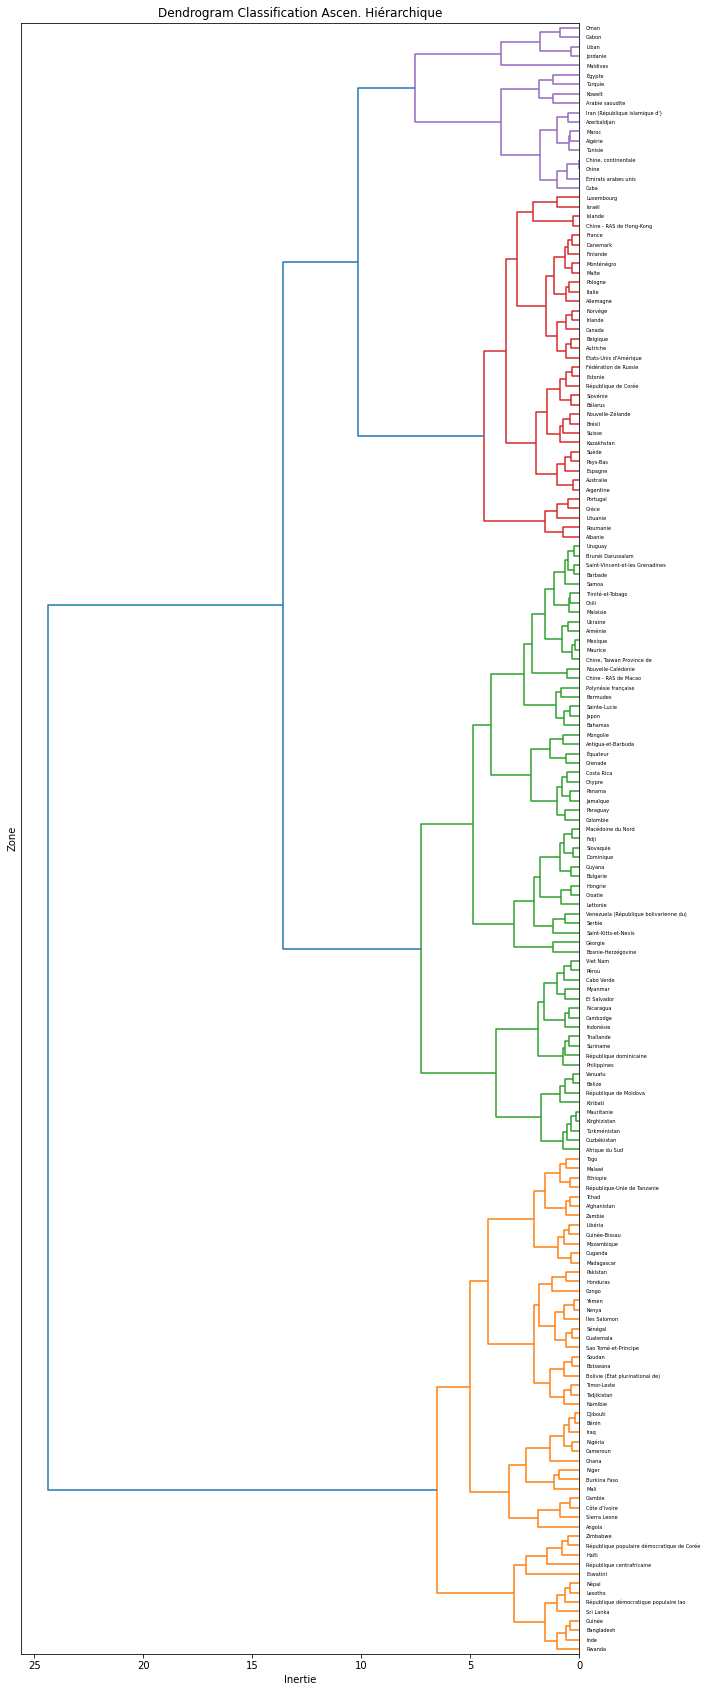

In [51]:

Z = sch.linkage(X ,method='ward',metric='euclidean')

fig =plt.figure(figsize=(10,30))
plt.title('Dendrogram Classification Ascen. Hiérarchique')
plt.xlabel("Inertie")
plt.ylabel('Zone')
entire_dendro = sch.dendrogram(Z,labels = df12.index,color_threshold=9, orientation='left')
plt.show(entire_dendro)


fig.savefig('Dendrogram_Classi_Ascend_Hiérarchique')

In [52]:
X1 = df12.values
X1=StandardScaler().fit_transform(X)

In [53]:
from plotly.figure_factory import create_dendrogram
import numpy as np
  
  

fig = create_dendrogram(X1)
fig.show()

In [54]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron")
fig.show()

visualisation des groupes

In [55]:
groupes_cah = fcluster(Z,5,criterion='maxclust')
groupes_cah


array([1, 2, 3, 4, 3, 1, 2, 4, 3, 2, 3, 3, 4, 2, 1, 2, 3, 2, 2, 1, 2, 1,
       2, 3, 2, 1, 3, 1, 2, 2, 1, 3, 2, 4, 3, 2, 2, 4, 2, 2, 1, 2, 2, 4,
       1, 3, 1, 2, 2, 3, 3, 1, 2, 3, 3, 3, 5, 1, 1, 2, 3, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 4, 1, 3, 3, 3, 3, 2, 2, 5, 3, 1, 2, 2, 4, 1, 2, 5,
       1, 3, 3, 2, 1, 2, 1, 5, 1, 3, 4, 2, 2, 2, 2, 3, 1, 2, 1, 2, 1, 1,
       3, 2, 3, 1, 5, 1, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2, 3, 1, 1, 3, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 3, 1, 1, 3, 2, 3, 1, 1, 1, 2, 1,
       1, 2, 4, 2, 4, 2, 2, 2, 2, 2, 1, 1, 1, 4, 4, 2, 3, 1, 1],
      dtype=int32)

In [56]:
# df cluster 
idg = np.argsort(groupes_cah)
df_dendogramme = pd.DataFrame(df12.index[idg],groupes_cah[idg]).reset_index()
df_dendogramme = df_dendogramme.rename(columns={'index':'cluster'})
df_dendogramme.head()

cluster         Zone
0        1  Afghanistan
1        1   Mozambique
2        1         Mali
3        1       Malawi
4        1   Madagascar

In [57]:
df12.reset_index(inplace=True)

In [58]:
df14 = pd.merge(df_dendogramme,df12)
df14.head()

cluster         Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1  Afghanistan                                          2087.0   
1        1   Mozambique                                          2282.0   
2        1         Mali                                          2887.0   
3        1       Malawi                                          2364.0   
4        1   Madagascar                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [59]:
df14.describe()

cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
count  173.000000                                      173.000000   
mean     2.144509                                     2843.202312   
std      1.032572                                      436.949999   
min      1.000000                                     1879.000000   
25%      1.000000                                     2528.000000   
50%      2.000000                                     2828.000000   
75%      3.000000                                     3173.000000   
max      5.000000                                     3770.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                         173.000000          
mean                                           81.234855          
std                                            19.988452          
min                                            37.660000          
25%                                            64.310000          
50%                                            81.570000          
75%                                            95.010000          
max                                           133.060000          

       ratio_prot_ani_prot_total  percentage_pop  
count                 173.000000      173.000000  
mean                   42.589067        6.233211  
std                    16.125645        7.733839  
min                     9.825674      -15.195138  
25%                    28.488746        1.628210  
50%                    43.585544        5.139859  
75%                    55.969540       10.857121  
max                    73.138607       33.100121

In [60]:
df14.to_csv('Zones_clusters.csv')

## Trouvons les centroides de chaque cluster, (par rapport aux clusters du dendogram).

In [61]:
df14.head()

cluster         Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1  Afghanistan                                          2087.0   
1        1   Mozambique                                          2282.0   
2        1         Mali                                          2887.0   
3        1       Malawi                                          2364.0   
4        1   Madagascar                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [62]:
list(set(list(df14["cluster"])))

[1, 2, 3, 4, 5]

In [63]:
dfclust1 = df14[df14['cluster'] == 1]

In [64]:
dfclust1.describe()

cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
count     53.0                                       53.000000   
mean       1.0                                     2376.811321   
std        0.0                                      243.202911   
min        1.0                                     1879.000000   
25%        1.0                                     2204.000000   
50%        1.0                                     2383.000000   
75%        1.0                                     2542.000000   
max        1.0                                     3014.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          53.000000          
mean                                           60.090566          
std                                             9.008278          
min                                            37.660000          
25%                                            55.860000          
50%                                            59.650000          
75%                                            64.570000          
max                                            85.130000          

       ratio_prot_ani_prot_total  percentage_pop  
count                  53.000000       53.000000  
mean                   24.349768       10.693904  
std                     8.629860        6.605899  
min                     9.825674      -10.008000  
25%                    17.776584        7.247731  
50%                    22.965559       10.893877  
75%                    29.943503       14.175908  
max                    45.118253       30.307860

In [65]:
dfclust1.to_csv('dfclust1.csv')

In [66]:
# Valeur du centroid pour le cluster 1 
df14[df14['cluster'] == 1].mean()


cluster                                                        1.000000
Disponibilité alimentaire (Kcal/personne/jour)              2376.811321
Disponibilité de protéines en quantité (g/personne/jour)      60.090566
ratio_prot_ani_prot_total                                     24.349768
percentage_pop                                                10.693904
dtype: float64

In [67]:
df14.columns

Index(['cluster', 'Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'ratio_prot_ani_prot_total', 'percentage_pop'],
      dtype='object')

1
24.349767852738168 2376.811320754717
2
49.082860956834274 2806.2
3
59.33722430727957 3392.324324324324
4
34.501165833888166 3317.4615384615386
5
48.59848260604433 2971.4


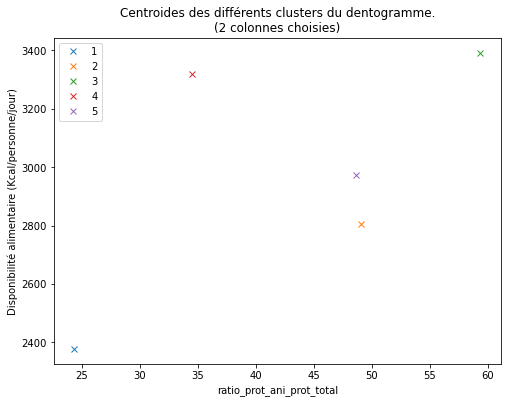

In [68]:
"""On ne peut représenter les points que sur une graphique à 2 dimensions. 
-> Il faut choisir 2 colonnes à représenter."""
plt.figure(figsize=(8,6))
x_axis = 'ratio_prot_ani_prot_total' #'Disponibilité alimentaire (Kcal/personne/jour)'
y_axis = 'Disponibilité alimentaire (Kcal/personne/jour)' #'Disponibilité de protéines en quantité (g/personne/jour)'
for clust_ in list(set(list(df14["cluster"]))):
    print(clust_)
    df14_loc = df14[df14['cluster'] == clust_].copy()
    val_x = df14_loc[x_axis].mean()
    val_y = df14_loc[y_axis].mean()
    print(val_x, val_y)
    plt.plot(val_x, val_y, 'x', label = str(clust_))
plt.legend()
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title("Centroides des différents clusters du dentogramme.\n(2 colonnes choisies)")
plt.show()

In [69]:
dfclust2 = df14[df14['cluster'] == 2]
dfclust2.describe()
dfclust2.to_csv('dfclust2.csv')

In [70]:
dfclust3 = df14[df14['cluster'] == 3]
dfclust3.describe()
dfclust3.to_csv('dfclust3.csv')

In [71]:
dfclust4 = df14[df14['cluster'] == 4]
dfclust4.describe()

cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
count     13.0                                       13.000000   
mean       4.0                                     3317.461538   
std        0.0                                      188.350566   
min        4.0                                     3089.000000   
25%        4.0                                     3113.000000   
50%        4.0                                     3293.000000   
75%        4.0                                     3402.000000   
max        4.0                                     3708.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          13.000000          
mean                                           97.784615          
std                                             6.728240          
min                                            87.250000          
25%                                            91.920000          
50%                                            98.050000          
75%                                           103.220000          
max                                           108.150000          

       ratio_prot_ani_prot_total  percentage_pop  
count                  13.000000       13.000000  
mean                   34.501166        7.637770  
std                     7.698085        5.645852  
min                    25.444126        0.636207  
25%                    27.217000        2.958781  
50%                    33.573807        5.392583  
75%                    40.050994        8.995725  
max                    49.533056       18.570318

In [72]:
dfclust4.to_csv('dfclust4.csv')

In [73]:
dfclust5 = df14[df14['cluster'] == 5]
dfclust5.describe()

cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
count      5.0                                        5.000000   
mean       5.0                                     2971.400000   
std        0.0                                      180.525068   
min        5.0                                     2733.000000   
25%        5.0                                     2826.000000   
50%        5.0                                     3059.000000   
75%        5.0                                     3099.000000   
max        5.0                                     3140.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                            5.00000          
mean                                            91.19600          
std                                             17.82847          
min                                             79.58000          
25%                                             79.59000          
50%                                             86.28000          
75%                                             88.21000          
max                                            122.32000          

       ratio_prot_ani_prot_total  percentage_pop  
count                   5.000000        5.000000  
mean                   48.598483       27.141911  
std                    14.394085        4.583263  
min                    34.166876       21.105095  
25%                    36.838799       24.795107  
50%                    49.895688       27.006845  
75%                    51.808185       29.702388  
max                    70.282865       33.100121

In [74]:
dfclust5.to_csv('dfclust5.csv')

In [75]:
dfclust1.head()

cluster         Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1  Afghanistan                                          2087.0   
1        1   Mozambique                                          2282.0   
2        1         Mali                                          2887.0   
3        1       Malawi                                          2364.0   
4        1   Madagascar                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [76]:
dfclust2.head()

cluster                 Zone  \
53        2            Nicaragua   
54        2              Maurice   
55        2               Belize   
56        2                Pérou   
57        2  Polynésie française   

    Disponibilité alimentaire (Kcal/personne/jour)  \
53                                          2638.0   
54                                          3067.0   
55                                          2746.0   
56                                          2697.0   
57                                          2923.0   

    Disponibilité de protéines en quantité (g/personne/jour)  \
53                                              69.54          
54                                              88.20          
55                                              73.20          
56                                              74.92          
57                                              97.27          

    ratio_prot_ani_prot_total  percentage_pop  
53                  30.500431        5.962430  
54                  45.124717        1.829646  
55                  39.549180       13.331993  
56                  36.091831        5.043130  
57                  65.590624        0.244527

In [77]:
dfclust3.head()

cluster                  Zone  \
118        3              Autriche   
119        3              Slovénie   
120        3             Australie   
121        3                 Grèce   
122        3  Fédération de Russie   

     Disponibilité alimentaire (Kcal/personne/jour)  \
118                                          3770.0   
119                                          3168.0   
120                                          3278.0   
121                                          3394.0   
122                                          3360.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
118                                             106.20          
119                                              96.02          
120                                             106.26          
121                                             108.65          
122                                             102.81          

     ratio_prot_ani_prot_total  percentage_pop  
118                  59.190207        4.458112  
119                  53.957509        0.280917  
120                  67.466591        6.246054  
121                  54.514496       -5.756889  
122                  54.644490        1.989952

In [78]:
dfclust4.head()

cluster                 Zone  \
155        4  Émirats arabes unis   
156        4              Algérie   
157        4               Koweït   
158        4                 Cuba   
159        4                Chine   

     Disponibilité alimentaire (Kcal/personne/jour)  \
155                                          3275.0   
156                                          3293.0   
157                                          3499.0   
158                                          3402.0   
159                                          3112.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
155                                             104.51          
156                                              91.92          
157                                             108.15          
158                                              90.86          
159                                              98.05          

     ratio_prot_ani_prot_total  percentage_pop  
155                  39.900488        2.958781  
156                  27.175805        7.152550  
157                  49.533056       18.570318  
158                  34.976888        0.636207  
159                  40.418154        2.926632

In [79]:
dfclust5.head()

cluster      Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
168        5      Oman                                          3140.0   
169        5     Gabon                                          2826.0   
170        5  Jordanie                                          3099.0   
171        5     Liban                                          3059.0   
172        5  Maldives                                          2733.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
168                                              88.21          
169                                              86.28          
170                                              79.58          
171                                              79.59          
172                                             122.32          

     ratio_prot_ani_prot_total  percentage_pop  
168                  51.808185       24.795107  
169                  49.895688       21.105095  
170                  34.166876       27.006845  
171                  36.838799       29.702388  
172                  70.282865       33.100121

# Enrichissiment des données 
## (Pour ensuite faire le K-MEANS)

In [80]:
dfPIB = pd.read_csv('FAOPIB.csv')

In [81]:
dfPIB = dfPIB[['Zone','Valeur']]
dfPIB.head()

Zone        Valeur
0     Afghanistan    681.034215
1  Afrique du Sud   6819.093360
2         Albanie   4376.970549
3         Algérie   5471.123389
4       Allemagne  45932.899299

In [82]:
# création de df pib en euros
dfPIB['Valeur'] = dfPIB['Valeur']*0.83

dfPIB.columns=['Zone', 'PIB_HAB_euros']
dfPIB.head()

Zone  PIB_HAB_euros
0     Afghanistan     565.258398
1  Afrique du Sud    5659.847489
2         Albanie    3632.885556
3         Algérie    4541.032413
4       Allemagne   38124.306418

In [83]:
df_poulets =pd.read_csv('FAOpoulet.csv')

In [84]:
df_poulets = df_poulets[['Zone','Élément','Valeur']]
df_poulets.head()

Zone                  Élément  Valeur
0     Afghanistan  Importations - Quantité  2874.0
1     Afghanistan    Importations - Valeur  3415.0
2     Afghanistan  Exportations - Quantité     0.0
3     Afghanistan    Exportations - Valeur     0.0
4  Afrique du Sud  Importations - Quantité   544.0

In [85]:
armenia= df_poulets.loc[ df_poulets['Zone'] == 'Albanie']

armenia

Zone                  Élément  Valeur
8   Albanie  Importations - Quantité  6443.0
9   Albanie    Importations - Valeur  5821.0
10  Albanie  Exportations - Quantité     0.0
11  Albanie    Exportations - Valeur     0.0

In [86]:
df_poulets

Zone                  Élément  Valeur
0       Afghanistan  Importations - Quantité  2874.0
1       Afghanistan    Importations - Valeur  3415.0
2       Afghanistan  Exportations - Quantité     0.0
3       Afghanistan    Exportations - Valeur     0.0
4    Afrique du Sud  Importations - Quantité   544.0
..              ...                      ...     ...
691          Zambie    Exportations - Valeur  1490.0
692        Zimbabwe  Importations - Quantité   180.0
693        Zimbabwe    Importations - Valeur  1580.0
694        Zimbabwe  Exportations - Quantité   953.0
695        Zimbabwe    Exportations - Valeur  2140.0

[696 rows x 3 columns]

In [87]:
data = df_poulets.pivot_table(index=["Zone"],columns = ["Élément"], values =["Valeur"], aggfunc=sum)
data

Valeur                        \
Élément               Exportations - Quantité Exportations - Valeur   
Zone                                                                  
Afghanistan                               0.0                   0.0   
Afrique du Sud                         8198.0               10267.0   
Albanie                                   0.0                   0.0   
Algérie                                   0.0                   0.0   
Allemagne                            270858.0              698650.0   
...                                       ...                   ...   
États-Unis d'Amérique                 87015.0              202798.0   
Éthiopie                                  0.0                   0.0   
Éthiopie RDP                              0.0                   0.0   
Îles Cook                                 NaN                   NaN   
Îles Féroé                                NaN                   NaN   

                                                                     
Élément               Importations - Quantité Importations - Valeur  
Zone                                                                 
Afghanistan                            2874.0                3415.0  
Afrique du Sud                          544.0                8287.0  
Albanie                                6443.0                5821.0  
Algérie                                5699.0               22905.0  
Allemagne                            166356.0              173124.0  
...                                       ...                   ...  
États-Unis d'Amérique                  5350.0               11616.0  
Éthiopie                                 70.0                 106.0  
Éthiopie RDP                              0.0                   0.0  
Îles Cook                                 3.0                   8.0  
Îles Féroé                                0.0                   0.0  

[194 rows x 4 columns]

In [88]:
data['Valeur'].columns

Index(['Exportations - Quantité', 'Exportations - Valeur',
       'Importations - Quantité', 'Importations - Valeur'],
      dtype='object', name='Élément')

In [89]:
newdata = data['Valeur'].copy()
# On va développer la colonne colonne qui contient des sous-colonnes. 
# Transformer les sous-colonnes en 'vrai' colonnes.

In [90]:
newdata.head()

Élément         Exportations - Quantité  Exportations - Valeur  \
Zone                                                             
Afghanistan                         0.0                    0.0   
Afrique du Sud                   8198.0                10267.0   
Albanie                             0.0                    0.0   
Algérie                             0.0                    0.0   
Allemagne                      270858.0               698650.0   

Élément         Importations - Quantité  Importations - Valeur  
Zone                                                            
Afghanistan                      2874.0                 3415.0  
Afrique du Sud                    544.0                 8287.0  
Albanie                          6443.0                 5821.0  
Algérie                          5699.0                22905.0  
Allemagne                      166356.0               173124.0

In [91]:
newdata.drop(['Exportations - Quantité','Importations - Quantité'], axis=1, inplace = True)


In [92]:
newdata.head()

Élément         Exportations - Valeur  Importations - Valeur
Zone                                                        
Afghanistan                       0.0                 3415.0
Afrique du Sud                10267.0                 8287.0
Albanie                           0.0                 5821.0
Algérie                           0.0                22905.0
Allemagne                    698650.0               173124.0

In [93]:
temp= pd.merge(dfPIB, newdata, on ='Zone', how= 'left')
temp.head()

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur
0     Afghanistan     565.258398                    0.0                 3415.0
1  Afrique du Sud    5659.847489                10267.0                 8287.0
2         Albanie    3632.885556                    0.0                 5821.0
3         Algérie    4541.032413                    0.0                22905.0
4       Allemagne   38124.306418               698650.0               173124.0

In [94]:
# jointure de df avec df pib
df122 = pd.merge(temp,df14, on= ['Zone'], how= 'right' )
# Par rapport au données du dentogramme: On l'a enrichi en rajoutant 4 colonnes.
df122.head()

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0  Afghanistan     565.258398                    0.0                 3415.0   
1   Mozambique     532.968249                    0.0                 3329.0   
2         Mali     667.199664                  840.0                 1842.0   
3       Malawi     264.882395                   87.0                  758.0   
4   Madagascar     449.086950                    1.0                   49.0   

   cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1                                          2087.0   
1        1                                          2282.0   
2        1                                          2887.0   
3        1                                          2364.0   
4        1                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [95]:
df122.to_csv('dfclusters_pib_exp_imp.csv')

In [96]:
df122.dropna(inplace = True)


In [97]:
df122

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0    Afghanistan     565.258398                    0.0                 3415.0   
1     Mozambique     532.968249                    0.0                 3329.0   
2           Mali     667.199664                  840.0                 1842.0   
3         Malawi     264.882395                   87.0                  758.0   
4     Madagascar     449.086950                    1.0                   49.0   
..           ...            ...                    ...                    ...   
166      Turquie   10410.632531                 8787.0                18165.0   
167       Égypte    2502.570597                   29.0                  421.0   
168         Oman   17567.429016                   33.0                 1790.0   
170     Jordanie    3316.408329                 1489.0                 4497.0   
171        Liban    7372.727282                   39.0                 3310.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0          1                                          2087.0   
1          1                                          2282.0   
2          1                                          2887.0   
3          1                                          2364.0   
4          1                                          2056.0   
..       ...                                             ...   
166        4                                          3708.0   
167        4                                          3518.0   
168        5                                          3140.0   
170        5                                          3099.0   
171        5                                          3059.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                58.26          
1                                                45.68          
2                                                85.13          
3                                                64.53          
4                                                46.69          
..                                                 ...          
166                                             108.12          
167                                             103.22          
168                                              88.21          
170                                              79.58          
171                                              79.59          

     ratio_prot_ani_prot_total  percentage_pop  
0                    20.957775       17.808929  
1                    13.879159       12.415255  
2                    27.828028       19.791376  
3                    12.071905        9.812025  
4                    21.482116       12.707613  
..                         ...             ...  
166                  33.573807        8.995725  
167                  25.518310       16.629750  
168                  51.808185       24.795107  
170                  34.166876       27.006845  
171                  36.838799       29.702388  

[137 rows x 9 columns]

# KMEANS.

L'enrichissement des données est terminé. Maintenant: Clusterisation à l'aide de l'algorithme K-means. 

On aura des résultats différents du dendogram car:
- 1) On a rajouté des colonnes. Donc classification sur des données un peu différentes.
- 2) K-means a un fonctionnement différent du dendogram qui produit souvent des résulats différents sur des données identiques. 

<AxesSubplot:>

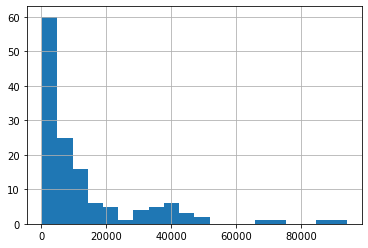

In [98]:
df122['PIB_HAB_euros'].hist(bins = 20)

In [99]:
df123 = df122.drop(['Zone', 'cluster'], axis =1).copy()
# On ne garde que les valeurs numériques. (Car K-means ne peut pas traiter autre chose).
df123.head()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0     565.258398                    0.0                 3415.0   
1     532.968249                    0.0                 3329.0   
2     667.199664                  840.0                 1842.0   
3     264.882395                   87.0                  758.0   
4     449.086950                    1.0                   49.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          2087.0   
1                                          2282.0   
2                                          2887.0   
3                                          2364.0   
4                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [100]:
"""Méthode rapide préprocessing. Mais pas possible retour en arrière."""
# X = preprocessing.scale(df123)
# X

'Méthode rapide préprocessing. Mais pas possible retour en arrière.'

Un preprocessing est un algoritmhe qui transforme les données pour qu'elles soient plus facilement exploitable par un algorithme future (K-Means, ...). 

Le preprocessing StandardScaler est la méthode de préprocessing la plus populaire. C'est une méthode qui va transformer les données de chacune des colonnes afin que la moyenne de la col = 0 et l'écart-type = 1.

Fonctionnement de l'algorithme StandardScaler:
- Pour chacune des colonne X:
    - Calcul de la moyenne M.
    - Calcul de l'écart type sigma. 
    - Chacun des élements x de la colonne transformés en (x - M) / (sigma^2).

In [101]:
"""Méthode classique préprocessing. Possible retour en arrière."""
scaler = preprocessing.StandardScaler().fit(df123)
X = scaler.transform(df123)
X

array([[-7.20342358e-01, -2.34106654e-01, -2.17082437e-01,
        -1.90823756e+00, -1.27128735e+00, -1.36267925e+00,
         1.53662371e+00],
       [-7.22189241e-01, -2.34106654e-01, -2.18480335e-01,
        -1.45591094e+00, -1.91999775e+00, -1.81099444e+00,
         8.43618037e-01],
       [-7.14511677e-01, -2.22757572e-01, -2.42650965e-01,
        -5.25386294e-02,  1.14312690e-01, -9.27560528e-01,
         1.79133819e+00],
       [-7.37522805e-01, -2.32931213e-01, -2.60270980e-01,
        -1.26570180e+00, -9.47963486e-01, -1.92545463e+00,
         5.09142363e-01],
       [-7.26986955e-01, -2.34093143e-01, -2.71795510e-01,
        -1.98014589e+00, -1.86791528e+00, -1.32947080e+00,
         8.81181623e-01],
       [-7.29387814e-01, -2.34106654e-01, -2.70868997e-01,
        -1.81081337e+00, -1.16145006e+00, -1.88352822e+00,
         1.02747093e+00],
       [-6.96037571e-01, -2.34106654e-01, -2.16481016e-01,
        -8.85283524e-01, -4.86440584e-01, -1.58848223e+00,
        -5.4235429

In [102]:
df123.head()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0     565.258398                    0.0                 3415.0   
1     532.968249                    0.0                 3329.0   
2     667.199664                  840.0                 1842.0   
3     264.882395                   87.0                  758.0   
4     449.086950                    1.0                   49.0   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                          2087.0   
1                                          2282.0   
2                                          2887.0   
3                                          2364.0   
4                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  
0                  20.957775       17.808929  
1                  13.879159       12.415255  
2                  27.828028       19.791376  
3                  12.071905        9.812025  
4                  21.482116       12.707613

In [103]:
df123_after_preprocessing = pd.DataFrame(X)
df123_after_preprocessing.columns = df123.columns

In [104]:
df123_after_preprocessing.head()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0      -0.720342              -0.234107              -0.217082   
1      -0.722189              -0.234107              -0.218480   
2      -0.714512              -0.222758              -0.242651   
3      -0.737523              -0.232931              -0.260271   
4      -0.726987              -0.234093              -0.271796   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                       -1.908238   
1                                       -1.455911   
2                                       -0.052539   
3                                       -1.265702   
4                                       -1.980146   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                          -1.271287          
1                                          -1.919998          
2                                           0.114313          
3                                          -0.947963          
4                                          -1.867915          

   ratio_prot_ani_prot_total  percentage_pop  
0                  -1.362679        1.536624  
1                  -1.810994        0.843618  
2                  -0.927561        1.791338  
3                  -1.925455        0.509142  
4                  -1.329471        0.881182

In [105]:
# Détail du calcul Standard_Scaler 
(565.258398 - 13159.433452) / (17547.756600)

-0.7177085562037029

In [106]:
df123.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
count     137.000000             137.000000             137.000000   
mean    13159.433452           17327.357664           16770.116788   
std     17547.756600           74286.417109           61746.711233   
min       264.882395               0.000000               0.000000   
25%      2291.040810               0.000000             850.000000   
50%      5747.673965              87.000000            3660.000000   
75%     15871.597209            3119.000000           10232.000000   
max     94073.227094          698650.000000          614024.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                      137.000000   
mean                                      2909.649635   
std                                        432.686454   
min                                       1924.000000   
25%                                       2584.000000   
50%                                       2924.000000   
75%                                       3255.000000   
max                                       3770.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                         137.000000          
mean                                           82.913212          
std                                            19.463485          
min                                            45.680000          
25%                                            64.570000          
50%                                            83.410000          
75%                                            98.050000          
max                                           129.070000          

       ratio_prot_ani_prot_total  percentage_pop  
count                 137.000000      137.000000  
mean                   42.473628        5.849362  
std                    15.847317        7.811578  
min                     9.825674      -15.195138  
25%                    27.961713        1.257580  
50%                    45.179765        4.999461  
75%                    55.791548       10.391428  
max                    73.138607       30.307860

In [107]:
df123_after_preprocessing.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
count   1.370000e+02           1.370000e+02           1.370000e+02   
mean   -5.632153e-17           4.436840e-17          -8.711604e-18   
std     1.003670e+00           1.003670e+00           1.003670e+00   
min    -7.375228e-01          -2.341067e-01          -2.725920e-01   
25%    -6.216337e-01          -2.341067e-01          -2.587756e-01   
50%    -4.239265e-01          -2.329312e-01          -2.131001e-01   
75%     1.551262e-01          -1.919664e-01          -1.062746e-01   
max     4.627983e+00           9.205221e+00           9.708139e+00   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                    1.370000e+02   
mean                                    -2.909271e-16   
std                                      1.003670e+00   
min                                     -2.286336e+00   
25%                                     -7.553846e-01   
50%                                      3.328745e-02   
75%                                      8.010829e-01   
max                                      1.995689e+00   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                       1.370000e+02          
mean                                       -3.583913e-16          
std                                         1.003670e+00          
min                                        -1.919998e+00          
25%                                        -9.459008e-01          
50%                                         2.561779e-02          
75%                                         7.805558e-01          
max                                         2.380158e+00          

       ratio_prot_ani_prot_total  percentage_pop  
count               1.370000e+02    1.370000e+02  
mean               -1.944916e-17   -1.944916e-17  
std                 1.003670e+00    1.003670e+00  
min                -2.067717e+00   -2.703900e+00  
25%                -9.190937e-01   -5.899746e-01  
50%                 1.713897e-01   -1.091994e-01  
75%                 8.434736e-01    5.835869e-01  
max                 1.942128e+00    3.142548e+00

In [108]:
clr = KMeans(n_clusters=5) # initialisation K-means.

In [109]:
clr.fit(X) # Application K-means à nos données.

KMeans(n_clusters=5)

In [110]:
clr.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 4, 4, 4,
       4, 1, 0, 0, 0, 4, 4, 3, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0,
       0, 0, 4, 0, 4, 3, 4, 4, 0, 4, 4, 4, 1, 4, 4, 4, 4, 0, 1, 4, 3, 0,
       0, 0, 3, 0, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 3,
       2, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1])

In [111]:
df122['clustKmean']= clr.labels_

In [112]:
df122


Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0    Afghanistan     565.258398                    0.0                 3415.0   
1     Mozambique     532.968249                    0.0                 3329.0   
2           Mali     667.199664                  840.0                 1842.0   
3         Malawi     264.882395                   87.0                  758.0   
4     Madagascar     449.086950                    1.0                   49.0   
..           ...            ...                    ...                    ...   
166      Turquie   10410.632531                 8787.0                18165.0   
167       Égypte    2502.570597                   29.0                  421.0   
168         Oman   17567.429016                   33.0                 1790.0   
170     Jordanie    3316.408329                 1489.0                 4497.0   
171        Liban    7372.727282                   39.0                 3310.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0          1                                          2087.0   
1          1                                          2282.0   
2          1                                          2887.0   
3          1                                          2364.0   
4          1                                          2056.0   
..       ...                                             ...   
166        4                                          3708.0   
167        4                                          3518.0   
168        5                                          3140.0   
170        5                                          3099.0   
171        5                                          3059.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                58.26          
1                                                45.68          
2                                                85.13          
3                                                64.53          
4                                                46.69          
..                                                 ...          
166                                             108.12          
167                                             103.22          
168                                              88.21          
170                                              79.58          
171                                              79.59          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
0                    20.957775       17.808929           1  
1                    13.879159       12.415255           1  
2                    27.828028       19.791376           1  
3                    12.071905        9.812025           1  
4                    21.482116       12.707613           1  
..                         ...             ...         ...  
166                  33.573807        8.995725           0  
167                  25.518310       16.629750           0  
168                  51.808185       24.795107           0  
170                  34.166876       27.006845           1  
171                  36.838799       29.702388           1  

[137 rows x 10 columns]

Caractérisation des clusters

In [113]:
dfcluster0 = df122.loc[df122['clustKmean']==0]
dfcluster0

Zone  PIB_HAB_euros  Exportations - Valeur  \
54                          Maurice    8020.152132                  445.0   
64               Bosnie-Herzégovine    4185.481571                 2377.0   
65                          Mexique    8632.473054                    0.0   
66               Nouvelle-Calédonie   32163.447462                   11.0   
74                   Afrique du Sud    5659.847489                10267.0   
78                          Uruguay   14011.398471                    0.0   
79                          Ukraine    3372.376686                  329.0   
81                Trinité-et-Tobago   16786.771630                    0.0   
85                          Arménie    3190.180323                   94.0   
93                          Barbade   13741.566039                  630.0   
94                         Lettonie   12312.051674                  115.0   
95                          Hongrie   11419.728718                70792.0   
97                            Japon   33350.072282                    0.0   
102                           Chili   13231.360289                    0.0   
114                         Croatie   11264.520008                 3757.0   
119                        Slovénie   19443.978793                 1044.0   
121                           Grèce   17585.036127                 4416.0   
122            Fédération de Russie   13277.510013                 6194.0   
124                       Argentine   11966.459807                 1190.0   
128                         Estonie   15871.597209                  292.0   
129                         Espagne   24079.391688                34608.0   
130                         Albanie    3632.885556                    0.0   
135                      Kazakhstan   11414.179567                   13.0   
138                         Bélarus    6613.408766                   64.0   
139                          Brésil   10140.081727                51997.0   
141                           Malte   19907.974171                   58.0   
147                        Portugal   17846.932451                21509.0   
149                        Roumanie    7897.416010                23503.0   
150                      Monténégro    5909.094901                   22.0   
152             République de Corée   22678.437092                   16.0   
153                        Lituanie   12860.397379                 2290.0   
154                         Pologne   11357.828994                39952.0   
155             Émirats arabes unis   35951.564888                  753.0   
156                         Algérie    4541.032413                    0.0   
158                            Cuba    5610.927355                    0.0   
159                           Chine    5907.948892                29756.0   
160                         Tunisie    3485.330786                    0.0   
161                           Maroc    2621.311267                 1691.0   
162                 Arabie saoudite   20695.540498                 9782.0   
163             Chine, continentale    5744.525005                29756.0   
164                     Azerbaïdjan    6558.480273                   25.0   
165  Iran (République islamique d')    5782.327469                 4296.0   
166                         Turquie   10410.632531                 8787.0   
167                          Égypte    2502.570597                   29.0   
168                            Oman   17567.429016                   33.0   

     Importations - Valeur  cluster  \
54                   755.0        2   
64                  1840.0        2   
65                 25806.0        2   
66                    37.0        2   
74                  8287.0        2   
78                  2134.0        2   
79                 64663.0        2   
81                   958.0        2   
85                  4397.0        2   
93                     0.0        2   
94                  1849.0        2   
95                 2

In [114]:
dfcluster0.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur    cluster  \
count      45.000000              45.000000              45.000000  45.000000   
mean    12248.970202            8019.844444           15792.311111   2.977778   
std      8208.670737           15657.577683           21358.930577   0.839071   
min      2502.570597               0.000000               0.000000   2.000000   
25%      5782.327469              16.000000            1849.000000   2.000000   
50%     11357.828994             445.000000            5821.000000   3.000000   
75%     16786.771630            6194.000000           22905.000000   4.000000   
max     35951.564888           70792.000000           83107.000000   5.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                        45.00000   
mean                                       3209.40000   
std                                         192.95388   
min                                        2726.00000   
25%                                        3068.00000   
50%                                        3188.00000   
75%                                        3359.00000   
max                                        3708.00000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          45.000000          
mean                                           96.354222          
std                                             9.478821          
min                                            78.750000          
25%                                            88.630000          
50%                                            95.010000          
75%                                           103.000000          
max                                           124.360000          

       ratio_prot_ani_prot_total  percentage_pop  clustKmean  
count                  45.000000       45.000000        45.0  
mean                   48.112204        2.298036         0.0  
std                    11.077953        7.087382         0.0  
min                    25.444126      -15.195138         0.0  
25%                    40.418154       -0.778997         0.0  
50%                    51.808185        2.333078         0.0  
75%                    55.969540        5.392583         0.0  
max                    65.233918       24.795107         0.0

In [115]:
dfcluster1 = df122.loc[df122['clustKmean']==1]
dfcluster1

Zone  PIB_HAB_euros  Exportations - Valeur  \
0                    Afghanistan     565.258398                    0.0   
1                     Mozambique     532.968249                    0.0   
2                           Mali     667.199664                  840.0   
3                         Malawi     264.882395                   87.0   
4                     Madagascar     449.086950                    1.0   
6                       Éthiopie     407.111297                    0.0   
7                        Lesotho     990.193484                    0.0   
8                          Kenya    1020.154175                 1750.0   
9                        Namibie    4556.755022                    0.0   
10                          Iraq    5747.673965                    0.0   
11                      Honduras    1773.522341                  195.0   
14                        Guinée     602.654205                    0.0   
15                     Guatemala    2865.848012                 1592.0   
16                         Ghana    1993.506929                    0.0   
17                        Gambie     614.070410                    0.0   
19                          Inde    1244.487409                  833.0   
20                         Niger     460.258385                    0.0   
21                       Nigéria    2487.479976                    0.0   
22                         Népal     540.590513                    1.0   
23                      Zimbabwe    1052.545105                 2140.0   
24                        Zambie    1456.177039                 1490.0   
25                         Yémen    1127.874775                    0.0   
30                       Sénégal    1129.172370                  250.0   
33                  Sierra Leone     589.979521                    0.0   
35   République-Unie de Tanzanie     766.216075                    2.0   
39                        Rwanda     571.767813                   23.0   
40                      Pakistan    1006.110509                 3119.0   
41                       Ouganda     568.305363                   77.0   
43                 Côte d'Ivoire    1181.590030                    5.0   
45                  Burkina Faso     653.413002                  117.0   
46                    Bangladesh     808.580639                    0.0   
48                         Bénin     755.855437                    0.0   
49                        Angola    4364.479050                    0.0   
50                      Botswana    5810.838200                    1.0   
51                      Cameroun    1239.811109                    0.0   
53                     Nicaragua    1533.176603                    0.0   
55                        Belize    3808.790195                    0.0   
62                   Ouzbékistan    1907.666958                    0.0   
107                     Cambodge     843.592264                    0.0   
115                    Indonésie    3005.151104                    2.0   
170                     Jordanie    3316.408329                 1489.0   
171                        Liban    7372.727282                   39.0   

     Importations - Valeur  cluster  \
0                   3415.0        1   
1                   3329.0        1   
2                   1842.0        1   
3                    758.0        1   
4                     49.0        1   
6                    106.0        1   
7                   3452.0        1   
8                    847.0        1   
9                   2168.0        1   
10                  1670.0        1   
11                  3801.0        1   
14                  1233.0        1   
15                 14331.0        1   
16                  8886.0        1   
17                    26.0        1   
19                  3268.0        1   
20                    83.0        1   
21                   112.0        1   
22                  2723.0        1   
23                  1580.0        1   
24                  2834.0

In [116]:
dfcluster1.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur    cluster  \
count      42.000000              42.000000              42.000000  42.000000   
mean     1729.855489             334.595238            2715.357143   1.309524   
std      1691.494132             718.554886            3121.983819   0.896826   
min       264.882395               0.000000              16.000000   1.000000   
25%       605.508257               0.000000             541.750000   1.000000   
50%      1036.349640               0.500000            1694.500000   1.000000   
75%      1972.046936             109.500000            3442.750000   1.000000   
max      7372.727282            3119.000000           14331.000000   5.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                       42.000000   
mean                                      2490.047619   
std                                        283.248659   
min                                       1924.000000   
25%                                       2238.500000   
50%                                       2473.500000   
75%                                       2671.250000   
max                                       3099.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          42.000000          
mean                                           63.664762          
std                                             9.532835          
min                                            45.680000          
25%                                            57.647500          
50%                                            62.900000          
75%                                            68.157500          
max                                            85.130000          

       ratio_prot_ani_prot_total  percentage_pop  clustKmean  
count                  42.000000       42.000000        42.0  
mean                   24.249159       12.602089         1.0  
std                     8.286446        6.854494         0.0  
min                     9.825674        1.063201         1.0  
25%                    17.662636        8.025559         1.0  
50%                    23.459525       12.281219         1.0  
75%                    28.961967       15.257043         1.0  
max                    41.665393       30.307860         1.0

In [117]:
dfcluster2 = df122.loc[df122['clustKmean']==2]
dfcluster2

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
125  Allemagne   38124.306418               698650.0               173124.0   
143   Pays-Bas   43222.062380               401566.0               614024.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
125        3                                          3503.0   
143        3                                          3222.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
125                                             101.39          
143                                             111.46          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
125                  60.647007        0.478100           2  
143                  67.970572        1.761827           2

In [118]:
dfcluster2.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  cluster  \
count       2.000000               2.000000               2.000000      2.0   
mean    40673.184399          550108.000000          393574.000000      3.0   
std      3604.657810          210070.110982          311763.379825      0.0   
min     38124.306418          401566.000000          173124.000000      3.0   
25%     39398.745409          475837.000000          283349.000000      3.0   
50%     40673.184399          550108.000000          393574.000000      3.0   
75%     41947.623390          624379.000000          503799.000000      3.0   
max     43222.062380          698650.000000          614024.000000      3.0   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                        2.000000   
mean                                      3362.500000   
std                                        198.697006   
min                                       3222.000000   
25%                                       3292.250000   
50%                                       3362.500000   
75%                                       3432.750000   
max                                       3503.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                           2.000000          
mean                                          106.425000          
std                                             7.120565          
min                                           101.390000          
25%                                           103.907500          
50%                                           106.425000          
75%                                           108.942500          
max                                           111.460000          

       ratio_prot_ani_prot_total  percentage_pop  clustKmean  
count                   2.000000        2.000000         2.0  
mean                   64.308790        1.119964         2.0  
std                     5.178543        0.907732         0.0  
min                    60.647007        0.478100         2.0  
25%                    62.477898        0.799032         2.0  
50%                    64.308790        1.119964         2.0  
75%                    66.139681        1.440896         2.0  
max                    67.970572        1.761827         2.0

In [119]:
dfcluster3 = df122.loc[df122['clustKmean']==3]
dfcluster3

Zone  PIB_HAB_euros  Exportations - Valeur  \
71          Brunéi Darussalam   37016.402820                    0.0   
99       Chine - RAS de Macao   74306.036250                    0.0   
118                  Autriche   41614.141251                 9075.0   
123                     Suède   50466.656320                15442.0   
126                    France   35301.924265               208181.0   
127                  Finlande   41416.716376                 4342.0   
131     États-Unis d'Amérique   44151.527825               202798.0   
132                    Suisse   70266.982780                  323.0   
133  Chine - RAS de Hong-Kong   32010.371060                    0.0   
134                  Danemark   50582.528670                79194.0   
136          Nouvelle-Zélande   35052.593885                 6137.0   
137                    Canada   43487.730393                14454.0   
140                Luxembourg   94073.227094                  346.0   
142                    Italie   29786.346479                11480.0   
144                   Norvège   85460.594833                    0.0   
145                    Israël   31055.460498                    0.0   
148                   Irlande   42288.024923                10814.0   
151                  Belgique   38825.538004                87024.0   
157                    Koweït   40173.336128                  255.0   

     Importations - Valeur  cluster  \
71                   893.0        2   
99                 12150.0        2   
118                27464.0        3   
123                 4353.0        3   
126                23124.0        3   
127                 1426.0        3   
131                11616.0        3   
132                 2291.0        3   
133                 9871.0        3   
134                16446.0        3   
136                    0.0        3   
137                38152.0        3   
140                  850.0        3   
142                14305.0        3   
144                  433.0        3   
145                 5005.0        3   
148                 8548.0        3   
151               334425.0        3   
157                 5050.0        4   

     Disponibilité alimentaire (Kcal/personne/jour)  \
71                                           2985.0   
99                                           2915.0   
118                                          3770.0   
123                                          3180.0   
126                                          3482.0   
127                                          3366.0   
131                                          3682.0   
132                                          3393.0   
133                                          3286.0   
134                                          3366.0   
136                                          3136.0   
137                                          3499.0   
140                                          3540.0   
142                                          3578.0   
144                                          3483.0   
145                                          3610.0   
148                                          3602.0   
151                                          3737.0   
157                                          3499.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
71                                               93.29          
99                                               94.75          
118                                             106.20          
123                                             107.48          
126                                             110.50          
127                                             117.56          
131                                             109.42          
132                                              92.89          
133                                             129.07          
134                                             108.74          
136    

In [120]:
dfcluster3.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur    cluster  \
count      19.000000              19.000000              19.000000  19.000000   
mean    48280.849466           34203.421053           27179.052632   2.947368   
std     18777.206303           65370.263567           75113.241485   0.404651   
min     29786.346479               0.000000               0.000000   2.000000   
25%     36159.163543             127.500000            1858.500000   3.000000   
50%     41614.141251            6137.000000            8548.000000   3.000000   
75%     50524.592495           14948.000000           15375.500000   3.000000   
max     94073.227094          208181.000000          334425.000000   4.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                       19.000000   
mean                                      3426.789474   
std                                        238.823873   
min                                       2915.000000   
25%                                       3326.000000   
50%                                       3483.000000   
75%                                       3590.000000   
max                                       3770.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          19.000000          
mean                                          107.665263          
std                                            10.370253          
min                                            92.390000          
25%                                           102.215000          
50%                                           108.490000          
75%                                           110.615000          
max                                           129.070000          

       ratio_prot_ani_prot_total  percentage_pop  clustKmean  
count                  19.000000       19.000000        19.0  
mean                   60.439720        5.112643         3.0  
std                     5.463866        4.504071         0.0  
min                    49.533056       -0.598260         3.0  
25%                    57.638909        2.294847         3.0  
50%                    59.577350        4.017775         3.0  
75%                    63.981243        5.387967         3.0  
max                    73.138607       18.570318         3.0

In [121]:
dfcluster4 = df122.loc[df122['clustKmean']==4]
dfcluster4

Zone  PIB_HAB_euros  \
18                                 Eswatini    3001.351671   
31                                Sri Lanka    3004.972215   
47          Bolivie (État plurinational de)    2446.788973   
56                                    Pérou    5462.842734   
58                              Philippines    2291.040810   
59                                 Paraguay    4953.155242   
60                                   Panama    9860.197919   
68                                 Bulgarie    6350.256171   
70                    République de Moldova    1935.742972   
73                                 Équateur    5041.495388   
76   Venezuela (République bolivarienne du)   10165.985627   
82                                Thaïlande    5119.772116   
83                       Antigua-et-Barbuda   10024.145025   
84                                 Suriname    7872.035292   
86                                Slovaquie   15103.946567   
87                                   Serbie    5271.893555   
92                   République dominicaine    5058.624657   
96                                 Jamaïque    4157.529422   
98                                 Colombie    6694.747015   
100                                  Chypre   23007.592223   
101                            Kirghizistan    1071.126620   
104                                 Grenade    6603.153720   
105                              Costa Rica    8772.822470   
106                                   Fidji    3953.083539   
108                                  Guyana    3273.668415   
109                             El Salvador    2920.036741   
111                                 Géorgie    3526.457856   
113                       Macédoine du Nord    4325.544293   
116                                Malaisie    9032.275447   

     Exportations - Valeur  Importations - Valeur  cluster  \
18                     0.0                 1847.0        1   
31                   186.0                 2993.0        1   
47                     0.0                 6314.0        1   
56                  4781.0                13524.0        2   
58                   341.0                 6436.0        2   
59                     0.0                10342.0        2   
60                    95.0                 4205.0        2   
68                  8829.0                 6093.0        2   
70                     0.0                 2357.0        2   
73                     0.0                11476.0        2   
76                     0.0                 6707.0        2   
82                  1525.0                22555.0        2   
83                     3.0                   36.0        2   
84                     0.0                  260.0        2   
86                 49635.0                32241.0        2   
87                   265.0                 7452.0        2   
92                  5412.0                 2474.0        2   
96                     3.0                   10.0        2   
98                  2432.0                 8926.0        2   
100                    0.0                  715.0        2   
101                    0.0                  305.0        2   
104                    0.0                  366.0        2   
105                 2828.0                 3864.0        2   
106                    0.0                   11.0        2   
108                    0.0                   36.0        2   
109                 8345.0                 4519.0        2   
111                    0.0                 2147.0        2   
113                  606.0                  779.0        2   
116               163535.0                10267.0        2   

     Disponibilité alimentaire (Kcal/personne/jour)  \
18                                           2326.0   
31                                           2537.0   
47                                           2250.0   
56                                           2697.0   
58                                        

In [122]:
dfcluster4.describe()

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur    cluster  \
count      29.000000              29.000000              29.000000  29.000000   
mean     6217.320162            8580.034483            5836.448276   1.896552   
std      4486.700570           31218.704258            7243.280850   0.309934   
min      1071.126620               0.000000              10.000000   1.000000   
25%      3273.668415               0.000000             715.000000   2.000000   
50%      5058.624657               3.000000            3864.000000   2.000000   
75%      7872.035292            2432.000000            7452.000000   2.000000   
max     23007.592223          163535.000000           32241.000000   2.000000   

       Disponibilité alimentaire (Kcal/personne/jour)  \
count                                       29.000000   
mean                                      2682.172414   
std                                        192.521440   
min                                       2250.000000   
25%                                       2576.000000   
50%                                       2725.000000   
75%                                       2817.000000   
max                                       2946.000000   

       Disponibilité de protéines en quantité (g/personne/jour)  \
count                                          29.000000          
mean                                           72.095172          
std                                             8.501916          
min                                            58.160000          
25%                                            64.310000          
50%                                            72.960000          
75%                                            79.270000          
max                                            85.130000          

       ratio_prot_ani_prot_total  percentage_pop  clustKmean  
count                  29.000000       29.000000        29.0  
mean                   46.841410        2.389072         4.0  
std                     9.172280        5.705066         0.0  
min                    27.342833      -10.008000         4.0  
25%                    41.150951       -0.208382         4.0  
50%                    48.238659        2.698388         4.0  
75%                    52.261513        6.008398         4.0  
max                    68.068032       13.942542         4.0

In [123]:
df_clusters = df122.groupby(['clustKmean']).mean()
df_clusters

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
clustKmean                                                                
0            12248.970202            8019.844444           15792.311111   
1             1729.855489             334.595238            2715.357143   
2            40673.184399          550108.000000          393574.000000   
3            48280.849466           34203.421053           27179.052632   
4             6217.320162            8580.034483            5836.448276   

             cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
clustKmean                                                             
0           2.977778                                     3209.400000   
1           1.309524                                     2490.047619   
2           3.000000                                     3362.500000   
3           2.947368                                     3426.789474   
4           1.896552                                     2682.172414   

            Disponibilité de protéines en quantité (g/personne/jour)  \
clustKmean                                                             
0                                                   96.354222          
1                                                   63.664762          
2                                                  106.425000          
3                                                  107.665263          
4                                                   72.095172          

            ratio_prot_ani_prot_total  percentage_pop  
clustKmean                                             
0                           48.112204        2.298036  
1                           24.249159       12.602089  
2                           64.308790        1.119964  
3                           60.439720        5.112643  
4                           46.841410        2.389072

In [124]:
armenia= df122.loc[ df122['Zone'] == 'Roumanie']

armenia

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
149  Roumanie     7897.41601                23503.0                49244.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
149        3                                          3359.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
149                                              103.0          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
149                  45.834951      -11.242044           0

In [125]:
armenia= df122.loc[ df122['Zone'] == 'Suisse']

armenia

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
132  Suisse    70266.98278                  323.0                 2291.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
132        3                                          3393.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
132                                              92.89          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
132                  64.334159        5.250193           3

In [126]:
m = df122.mean()
m

PIB_HAB_euros                                               13159.433452
Exportations - Valeur                                       17327.357664
Importations - Valeur                                       16770.116788
cluster                                                         2.233577
Disponibilité alimentaire (Kcal/personne/jour)               2909.649635
Disponibilité de protéines en quantité (g/personne/jour)       82.913212
ratio_prot_ani_prot_total                                      42.473628
percentage_pop                                                  5.849362
clustKmean                                                      1.598540
dtype: float64

In [127]:
df_clusters.to_csv('centroides_kmean.csv')

In [128]:
# on calcule la moyenne de chaque cluster -> Même chose que calcul des centroides. (Avec valeurs réelles.)
df_clusters_mean = df122.groupby(['clustKmean']).mean()
df_clusters_mean

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
clustKmean                                                                
0            12248.970202            8019.844444           15792.311111   
1             1729.855489             334.595238            2715.357143   
2            40673.184399          550108.000000          393574.000000   
3            48280.849466           34203.421053           27179.052632   
4             6217.320162            8580.034483            5836.448276   

             cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
clustKmean                                                             
0           2.977778                                     3209.400000   
1           1.309524                                     2490.047619   
2           3.000000                                     3362.500000   
3           2.947368                                     3426.789474   
4           1.896552                                     2682.172414   

            Disponibilité de protéines en quantité (g/personne/jour)  \
clustKmean                                                             
0                                                   96.354222          
1                                                   63.664762          
2                                                  106.425000          
3                                                  107.665263          
4                                                   72.095172          

            ratio_prot_ani_prot_total  percentage_pop  
clustKmean                                             
0                           48.112204        2.298036  
1                           24.249159       12.602089  
2                           64.308790        1.119964  
3                           60.439720        5.112643  
4                           46.841410        2.389072

In [129]:
# on calcule l'ecart type de chaque cluster
df_clusters_std = df122.groupby(['clustKmean']).std()
df_clusters_std

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
clustKmean                                                                
0             8208.670737           15657.577683           21358.930577   
1             1691.494132             718.554886            3121.983819   
2             3604.657810          210070.110982          311763.379825   
3            18777.206303           65370.263567           75113.241485   
4             4486.700570           31218.704258            7243.280850   

             cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
clustKmean                                                             
0           0.839071                                      192.953880   
1           0.896826                                      283.248659   
2           0.000000                                      198.697006   
3           0.404651                                      238.823873   
4           0.309934                                      192.521440   

            Disponibilité de protéines en quantité (g/personne/jour)  \
clustKmean                                                             
0                                                    9.478821          
1                                                    9.532835          
2                                                    7.120565          
3                                                   10.370253          
4                                                    8.501916          

            ratio_prot_ani_prot_total  percentage_pop  
clustKmean                                             
0                           11.077953        7.087382  
1                            8.286446        6.854494  
2                            5.178543        0.907732  
3                            5.463866        4.504071  
4                            9.172280        5.705066

In [130]:
# Moins pertinent car l'écart-type (écart moyen vs moyenne) est plus lisible que la variance ((écart moyen vs moyenne) au carré)
# 
# on calcule la variance de chaque cluster
df_clusters = df122.groupby(['clustKmean']).var(ddof=0)
df_clusters


PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
clustKmean                                                                
0            6.588489e+07           2.397117e+08           4.460661e+08   
1            2.793030e+06           5.040278e+05           9.514717e+06   
2            6.496779e+06           2.206473e+10           4.859820e+10   
3            3.340265e+08           4.048362e+09           5.345052e+09   
4            1.943633e+07           9.410003e+08           5.065598e+07   

             cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
clustKmean                                                             
0           0.688395                                    36403.840000   
1           0.785147                                    78319.569161   
2           0.000000                                    19740.250000   
3           0.155125                                    54034.903047   
4           0.092747                                    35786.418549   

            Disponibilité de protéines en quantité (g/personne/jour)  \
clustKmean                                                             
0                                                   87.851416          
1                                                   88.711249          
2                                                   25.351225          
3                                                  101.882025          
4                                                   69.790073          

            ratio_prot_ani_prot_total  percentage_pop  
clustKmean                                             
0                          119.993912       49.114745  
1                           67.030306       45.865418  
2                           13.408654        0.411989  
3                           28.282579       19.218934  
4                           81.229658       31.425442

In [131]:
dfcluster0.head()

Zone  PIB_HAB_euros  Exportations - Valeur  \
54             Maurice    8020.152132                  445.0   
64  Bosnie-Herzégovine    4185.481571                 2377.0   
65             Mexique    8632.473054                    0.0   
66  Nouvelle-Calédonie   32163.447462                   11.0   
74      Afrique du Sud    5659.847489                10267.0   

    Importations - Valeur  cluster  \
54                  755.0        2   
64                 1840.0        2   
65                25806.0        2   
66                   37.0        2   
74                 8287.0        2   

    Disponibilité alimentaire (Kcal/personne/jour)  \
54                                          3067.0   
64                                          3156.0   
65                                          3068.0   
66                                          2855.0   
74                                          3020.0   

    Disponibilité de protéines en quantité (g/personne/jour)  \
54                                              88.20          
64                                              91.50          
65                                              87.58          
66                                              86.61          
74                                              85.33          

    ratio_prot_ani_prot_total  percentage_pop  clustKmean  
54                  45.124717        1.829646           0  
64                  33.224044      -15.195138           0  
65                  46.426125        3.057900           0  
66                  60.397183        8.569143           0  
74                  42.646197        8.680221           0

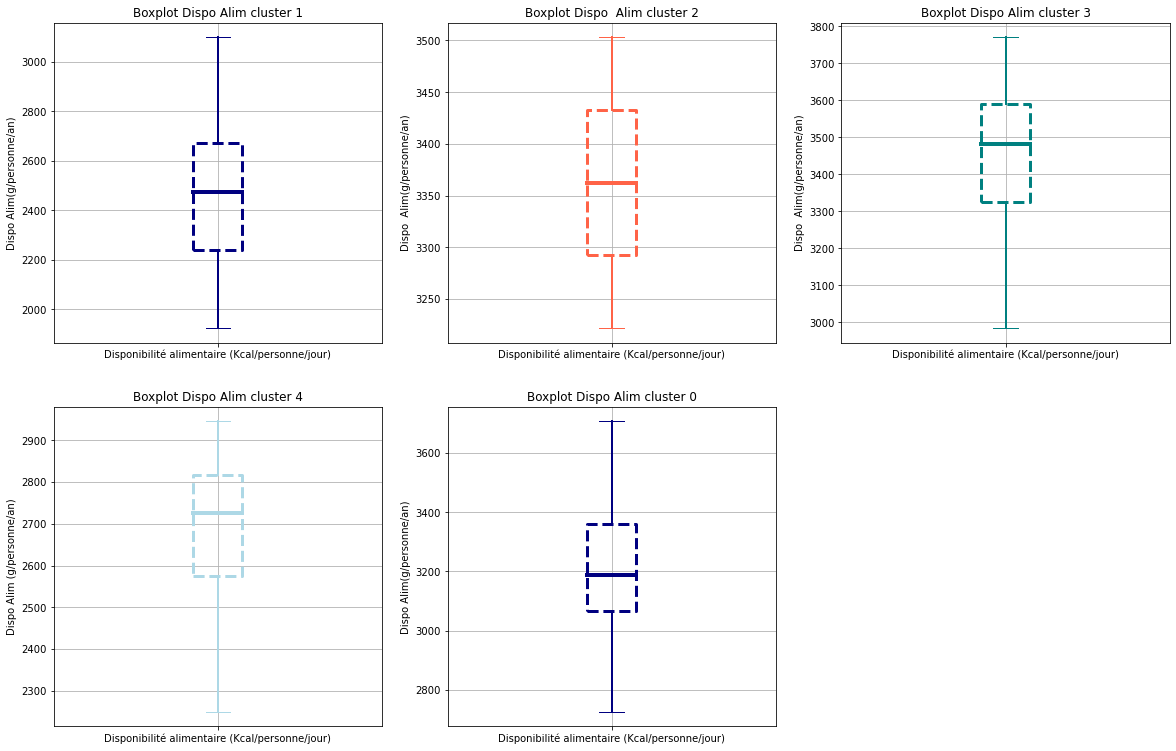

In [132]:
fig = plt.figure(figsize=(20,20))
plt.tight_layout()

plot_dfcluster0= plt.subplot(3,3,5)
BoxplotElements = dfcluster0.boxplot(column='Disponibilité alimentaire (Kcal/personne/jour)',showfliers=False,return_type='dict')
plot_dfcluster0.set_title('Boxplot Dispo Alim cluster 0')
plot_dfcluster0.set_ylabel('Dispo Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')

plot_dfcluster1= plt.subplot(3,3,1)
BoxplotElements = dfcluster1.boxplot(column='Disponibilité alimentaire (Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster1.set_title('Boxplot Dispo Alim cluster 1')
plot_dfcluster1.set_ylabel('Dispo Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_dfcluster2= plt.subplot(3,3,2)
BoxplotElements = dfcluster2.boxplot(column='Disponibilité alimentaire (Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster2.set_title('Boxplot Dispo  Alim cluster 2')
plot_dfcluster2.set_ylabel('Dispo  Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')
    
plot_dfcluster3= plt.subplot(3,3,3)
BoxplotElements = dfcluster3.boxplot(column='Disponibilité alimentaire (Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster3.set_title('Boxplot Dispo Alim cluster 3')
plot_dfcluster3.set_ylabel('Dispo  Alim(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_dfcluster4= plt.subplot(3,3,4)
BoxplotElements = dfcluster4.boxplot(column='Disponibilité alimentaire (Kcal/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster4.set_title('Boxplot Dispo Alim cluster 4')
plot_dfcluster4.set_ylabel('Dispo Alim (g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    

fig.savefig('compare_dispo_Alim')

<ipython-input-133-4385f58c6ac1>:10: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



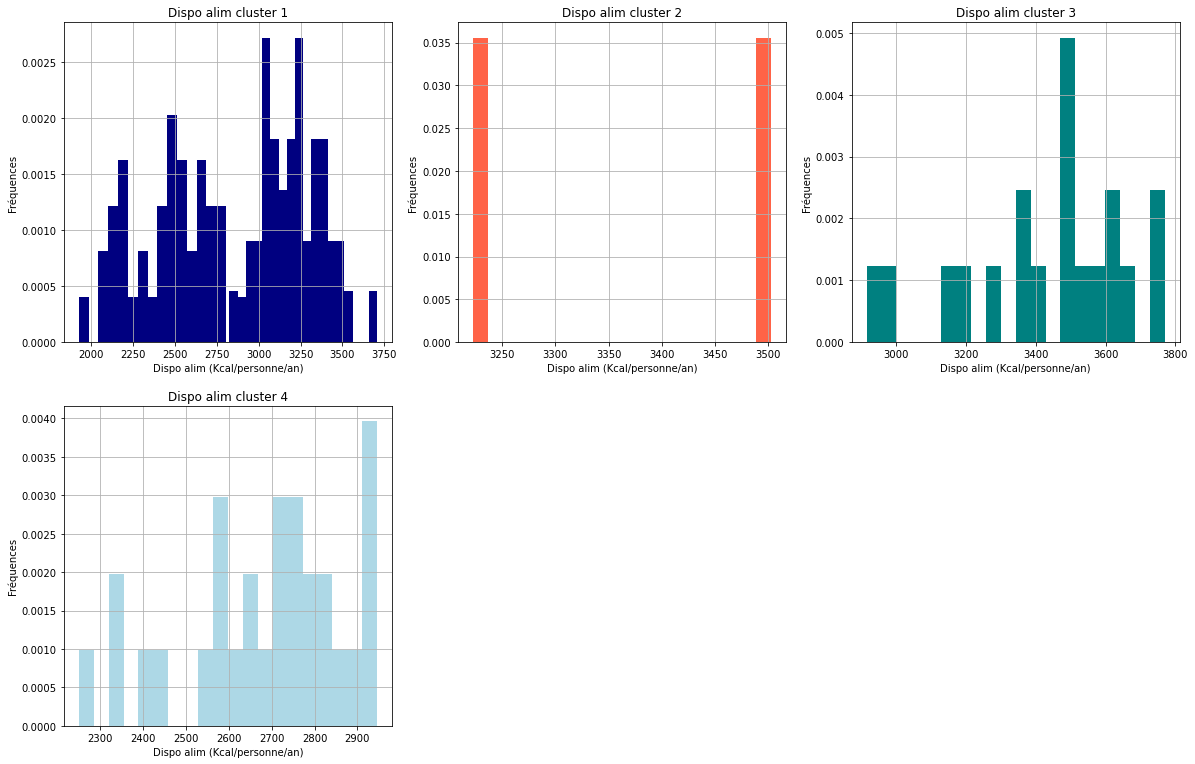

In [133]:
# histogramme de variable 'Disponibilité_alimentaire(Kcal/personne/jour)'
fig1 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_dfcluster0 = dfcluster0['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='navy')
plot_dfcluster0.set_title('Dispo alim cluster 1')
plot_dfcluster0.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_dfcluster0.set_ylabel('Fréquences')

plt.subplot(3,3,1)
plot_dfcluster1 = dfcluster1['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='navy')
plot_dfcluster1.set_title('Dispo alim cluster 1')
plot_dfcluster1.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_dfcluster1.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_dfcluster2 = dfcluster2['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='tomato')
plot_dfcluster2.set_title('Dispo alim cluster 2')
plot_dfcluster2.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_dfcluster2.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_dfcluster3 = dfcluster3['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='teal')
plot_dfcluster3.set_title('Dispo alim cluster 3')
plot_dfcluster3.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_dfcluster3.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_dfcluster4 = dfcluster4['Disponibilité alimentaire (Kcal/personne/jour)'].hist(density=True, bins=20,color='lightblue')
plot_dfcluster4.set_title('Dispo alim cluster 4')
plot_dfcluster4.set_xlabel('Dispo alim (Kcal/personne/an)')
plot_dfcluster4.set_ylabel('Fréquences')



fig1.savefig('comparaison_dispo_alim_histo')

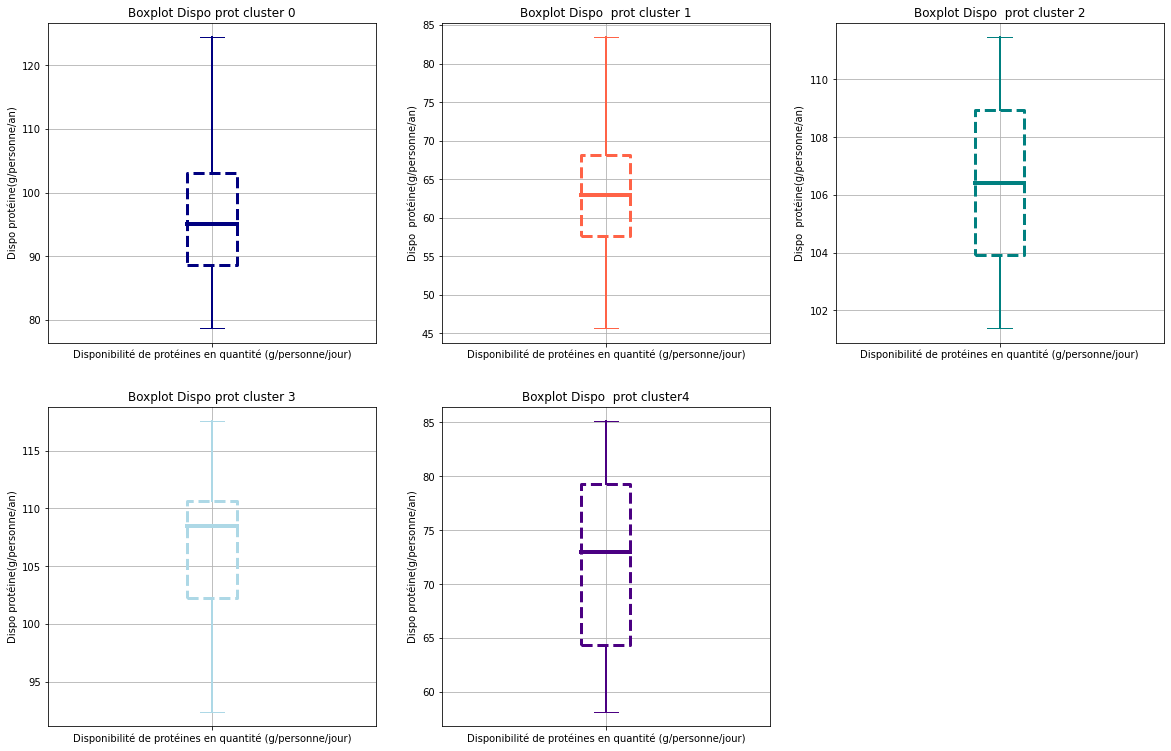

In [134]:
# boxplot  de la variable disponibilité de proteines journalieres
fig2 = plt.figure(figsize=(20,20))
plt.tight_layout()

plot_dfcluster0= plt.subplot(3,3,1)
BoxplotElements = dfcluster0.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster0.set_title('Boxplot Dispo prot cluster 0')
plot_dfcluster0.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_dfcluster1= plt.subplot(3,3,2)
BoxplotElements = dfcluster1.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster1.set_title('Boxplot Dispo  prot cluster 1')
plot_dfcluster1.set_ylabel('Dispo  protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')
    
plot_dfcluster2= plt.subplot(3,3,3)
BoxplotElements = dfcluster2.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster2.set_title('Boxplot Dispo  prot cluster 2')
plot_dfcluster2.set_ylabel('Dispo  protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_dfcluster3= plt.subplot(3,3,4)
BoxplotElements = dfcluster3.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster3.set_title('Boxplot Dispo prot cluster 3')
plot_dfcluster3.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_dfcluster4= plt.subplot(3,3,5)
BoxplotElements = dfcluster4.boxplot(column='Disponibilité de protéines en quantité (g/personne/jour)', showfliers=False,return_type='dict')
plot_dfcluster4.set_title('Boxplot Dispo  prot cluster4')
plot_dfcluster4.set_ylabel('Dispo protéine(g/personne/an)')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig2.savefig('compare_dispo_proteines')

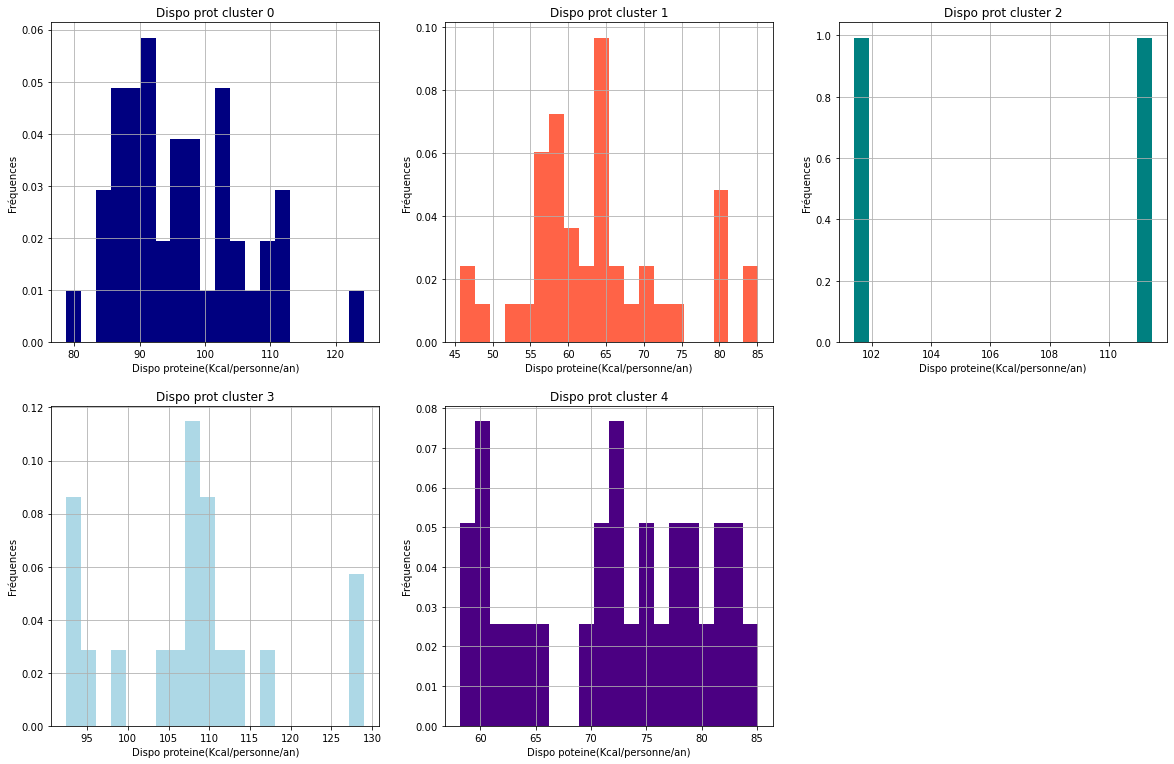

In [135]:
fig2 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_dfcluster0 = dfcluster0['Disponibilité de protéines en quantité (g/personne/jour)'].hist(density=True, bins=20,color='navy')
plot_dfcluster0.set_title('Dispo prot cluster 0')
plot_dfcluster0.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_dfcluster0.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_dfcluster1 = dfcluster1['Disponibilité de protéines en quantité (g/personne/jour)'].hist(density=True, bins=20,color='tomato')
plot_dfcluster1.set_title('Dispo prot cluster 1')
plot_dfcluster1.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_dfcluster1.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_dfcluster2 = dfcluster2['Disponibilité de protéines en quantité (g/personne/jour)'].hist(density=True, bins=20,color='teal')
plot_dfcluster2.set_title('Dispo prot cluster 2')
plot_dfcluster2.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_dfcluster2.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_dfcluster3 = dfcluster3['Disponibilité de protéines en quantité (g/personne/jour)'].hist(density=True, bins=20,color='lightblue')
plot_dfcluster3.set_title('Dispo prot cluster 3')
plot_dfcluster3.set_xlabel('Dispo proteine(Kcal/personne/an)')
plot_dfcluster3.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_dfcluster4 = dfcluster4['Disponibilité de protéines en quantité (g/personne/jour)'].hist(density=True, bins=20,color='indigo')
plot_dfcluster4.set_title('Dispo prot cluster 4')
plot_dfcluster4.set_xlabel('Dispo poteine(Kcal/personne/an)')
plot_dfcluster4.set_ylabel('Fréquences')

fig2.savefig('compare_dispo_proteines histo')

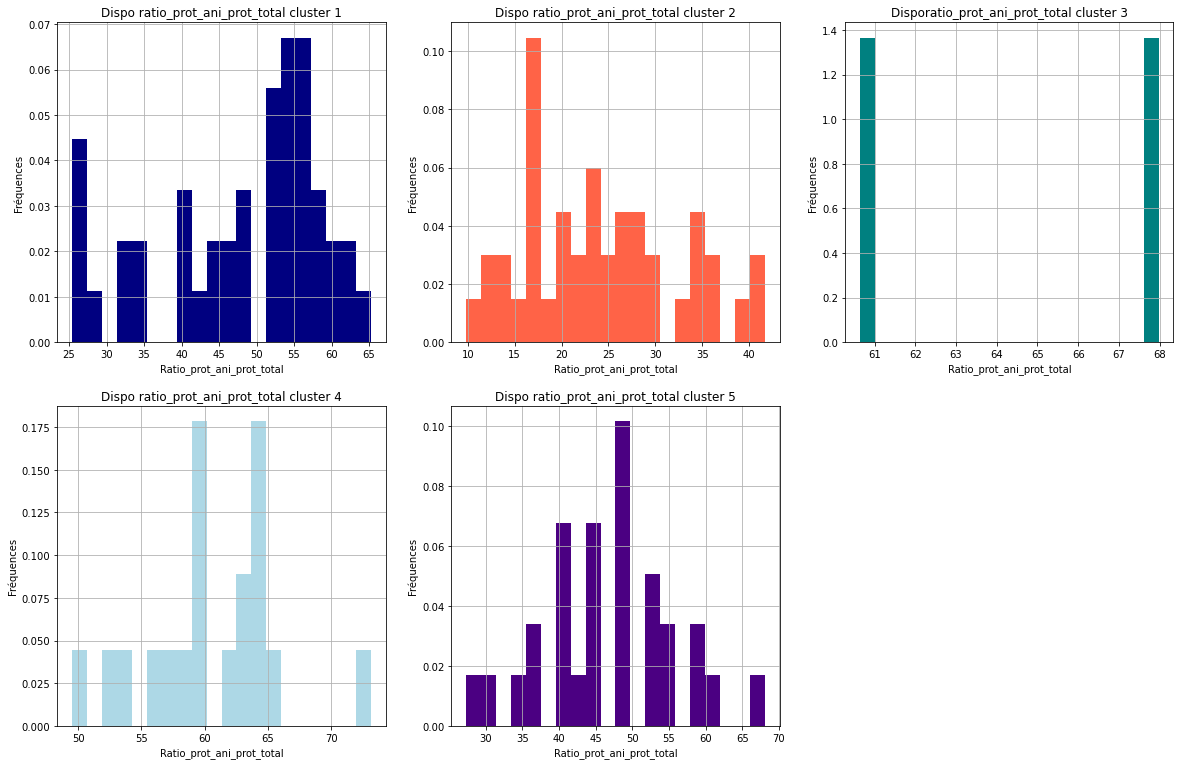

In [136]:
# histogramme de variable 'ratio_prot_ani_prot_total'
fig3 =plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_dfcluster0 = dfcluster0['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='navy')
plot_dfcluster0.set_title('Dispo ratio_prot_ani_prot_total cluster 1')
plot_dfcluster0.set_xlabel('Ratio_prot_ani_prot_total')
plot_dfcluster0.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_dfcluster1 = dfcluster1['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='tomato')
plot_dfcluster1.set_title('Dispo ratio_prot_ani_prot_total cluster 2')
plot_dfcluster1.set_xlabel('Ratio_prot_ani_prot_total')
plot_dfcluster1.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_dfcluster2 = dfcluster2['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='teal')
plot_dfcluster2.set_title('Disporatio_prot_ani_prot_total cluster 3')
plot_dfcluster2.set_xlabel('Ratio_prot_ani_prot_total')
plot_dfcluster2.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_dfcluster3 = dfcluster3['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='lightblue')
plot_dfcluster3.set_title('Dispo ratio_prot_ani_prot_total cluster 4')
plot_dfcluster3.set_xlabel('Ratio_prot_ani_prot_total')
plot_dfcluster3.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_dfcluster4 = dfcluster4['ratio_prot_ani_prot_total'].hist(density=True, bins=20,color='indigo')
plot_dfcluster4.set_title('Dispo ratio_prot_ani_prot_total cluster 5')
plot_dfcluster4.set_xlabel('Ratio_prot_ani_prot_total')
plot_dfcluster4.set_ylabel('Fréquences')

fig3.savefig('compare_Ratio_prot_ani_prot histo')

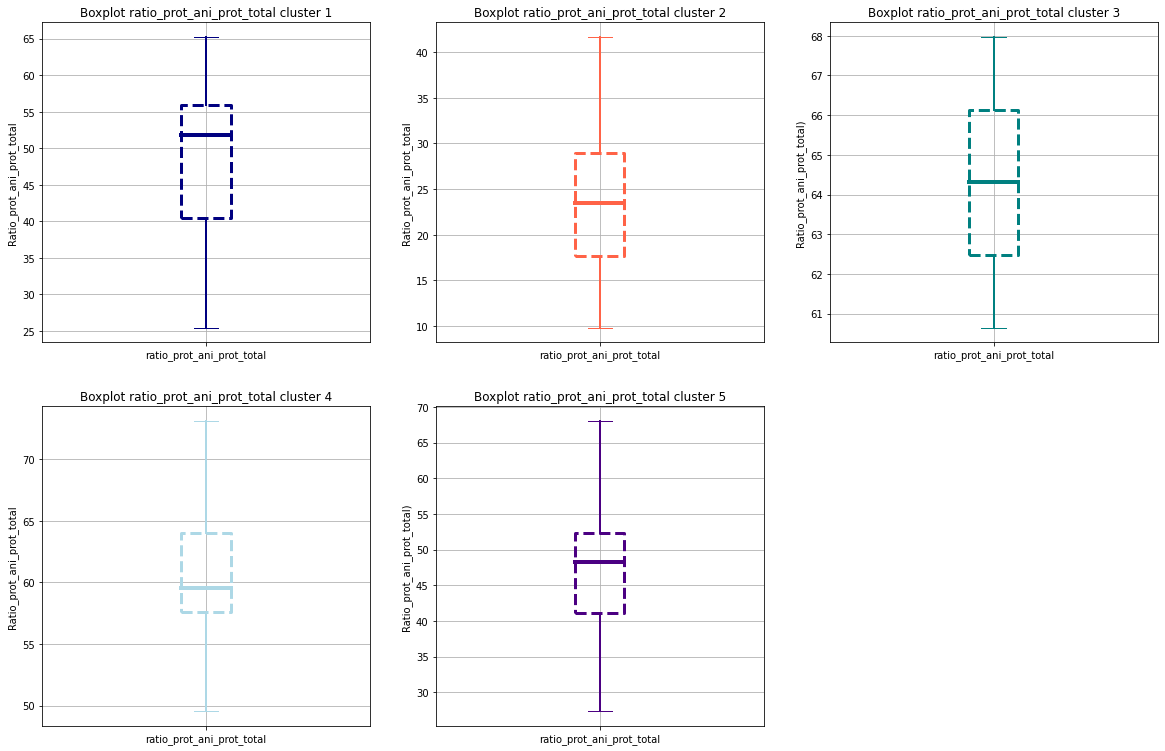

In [137]:
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_dfcluster0= plt.subplot(3,3,1)
BoxplotElements = dfcluster0.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_dfcluster0.set_title('Boxplot ratio_prot_ani_prot_total cluster 1')
plot_dfcluster0.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_dfcluster1= plt.subplot(3,3,2)
BoxplotElements = dfcluster1.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_dfcluster1.set_title('Boxplot ratio_prot_ani_prot_total cluster 2')
plot_dfcluster1.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')
plot_dfcluster2= plt.subplot(3,3,3)
BoxplotElements = dfcluster2.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_dfcluster2.set_title('Boxplot ratio_prot_ani_prot_total cluster 3')
plot_dfcluster2.set_ylabel('Ratio_prot_ani_prot_total)')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_dfcluster3= plt.subplot(3,3,4)
BoxplotElements = dfcluster3.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_dfcluster3.set_title('Boxplot ratio_prot_ani_prot_total cluster 4')
plot_dfcluster3.set_ylabel('Ratio_prot_ani_prot_total')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_dfcluster4= plt.subplot(3,3,5)
BoxplotElements = dfcluster4.boxplot(column='ratio_prot_ani_prot_total', showfliers=False,return_type='dict')
plot_dfcluster4.set_title('Boxplot ratio_prot_ani_prot_total cluster 5')
plot_dfcluster4.set_ylabel('Ratio_prot_ani_prot_total)')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig3.savefig('compare_ratio_prot_ani_prot')


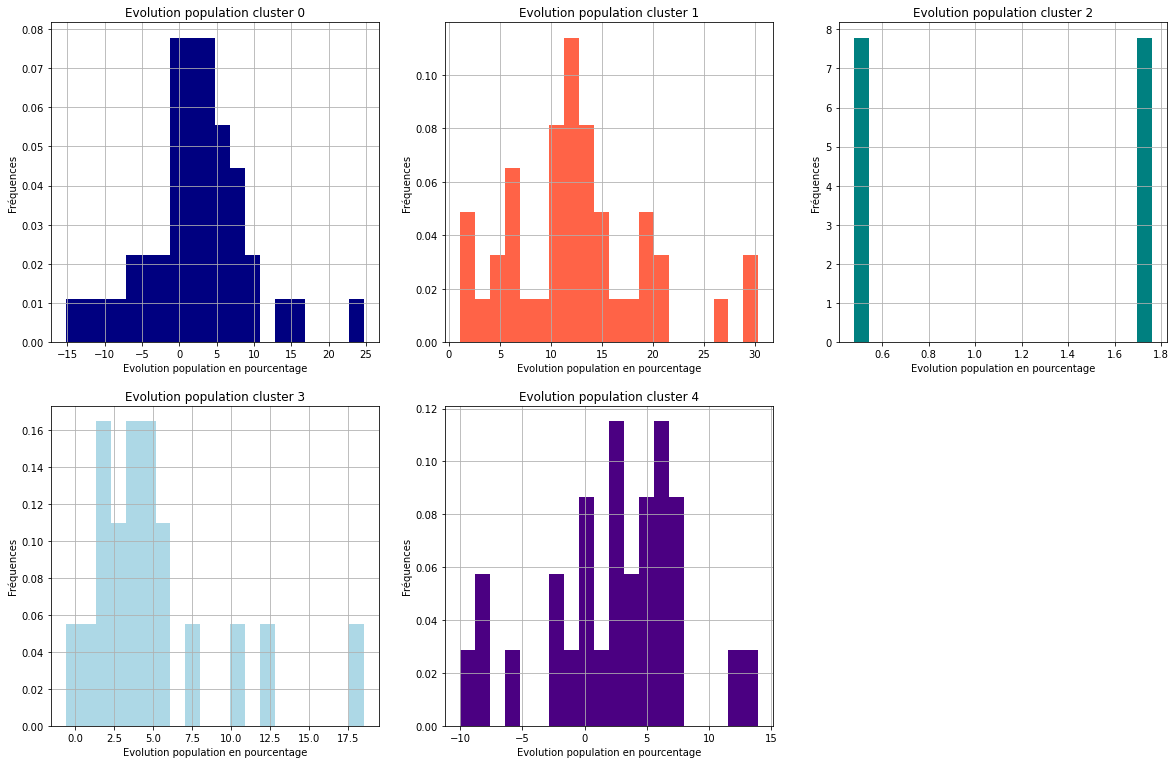

In [138]:
fig4 = plt.figure(figsize=(20,20))
plt.tight_layout()
plt.subplot(3,3,1)
plot_dfcluster0 = dfcluster0['percentage_pop'].hist(density=True, bins=20,color='navy')
plot_dfcluster0.set_title('Evolution population cluster 0')
plot_dfcluster0.set_xlabel('Evolution population en pourcentage')
plot_dfcluster0.set_ylabel('Fréquences')

plt.subplot(3,3,2)
plot_dfcluster1 = dfcluster1['percentage_pop'].hist(density=True, bins=20,color='tomato')
plot_dfcluster1.set_title('Evolution population cluster 1')
plot_dfcluster1.set_xlabel('Evolution population en pourcentage')
plot_dfcluster1.set_ylabel('Fréquences')

plt.subplot(3,3,3)
plot_dfcluster2 = dfcluster2['percentage_pop'].hist(density=True, bins=20,color='teal')
plot_dfcluster2.set_title('Evolution population cluster 2')
plot_dfcluster2.set_xlabel('Evolution population en pourcentage')
plot_dfcluster2.set_ylabel('Fréquences')

plt.subplot(3,3,4)
plot_dfcluster3 = dfcluster3['percentage_pop'].hist(density=True, bins=20,color='lightblue')
plot_dfcluster3.set_title('Evolution population cluster 3')
plot_dfcluster3.set_xlabel('Evolution population en pourcentage')
plot_dfcluster3.set_ylabel('Fréquences')

plt.subplot(3,3,5)
plot_dfcluster4 = dfcluster4['percentage_pop'].hist(density=True, bins=20,color='indigo')
plot_dfcluster4.set_title('Evolution population cluster 4')
plot_dfcluster4.set_xlabel('Evolution population en pourcentage')
plot_dfcluster4.set_ylabel('Fréquences')

fig4.savefig('compare_evolution_pop_cah')

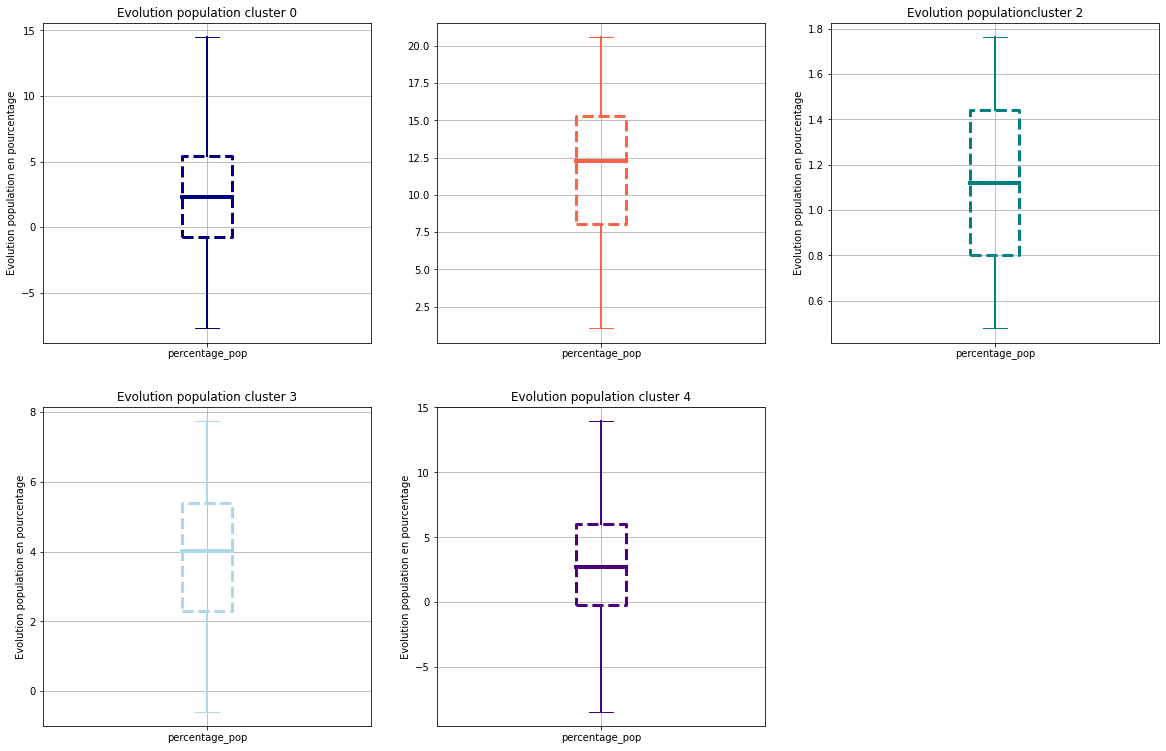

In [139]:
# boxplot  de la variable 'pourcentage_dif_pop_2012_2013'
fig3 = plt.figure(figsize=(20,20))
plt.tight_layout()
plot_dfcluster0= plt.subplot(3,3,1)
BoxplotElements = dfcluster0.boxplot(column='percentage_pop', showfliers=False,return_type='dict')
plot_dfcluster0.set_title('Evolution population cluster 0')
plot_dfcluster0.set_ylabel('Evolution population en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('navy')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('navy')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('navy')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('navy')
    
plot_df_cluster1= plt.subplot(3,3,2)
BoxplotElements = dfcluster1.boxplot(column='percentage_pop', showfliers=False,return_type='dict')
plot_dfcluster1.set_title('Evolution population cluster 1')
plot_dfcluster1.set_ylabel('Evolution population en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('tomato')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('tomato')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('tomato')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('tomato')

plot_dfcluster2= plt.subplot(3,3,3)
BoxplotElements = dfcluster2.boxplot(column='percentage_pop', showfliers=False,return_type='dict')
plot_dfcluster2.set_title('Evolution populationcluster 2')
plot_dfcluster2.set_ylabel('Evolution population en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('teal')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('teal')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('teal')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('teal')
    
plot_dfcluster3= plt.subplot(3,3,4)
BoxplotElements = dfcluster3.boxplot(column='percentage_pop', showfliers=False,return_type='dict')
plot_dfcluster3.set_title('Evolution population cluster 3')
plot_dfcluster3.set_ylabel('Evolution population en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('lightblue')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('lightblue')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('lightblue')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('lightblue')
    
plot_dfcluster4= plt.subplot(3,3,5)
BoxplotElements = dfcluster4.boxplot(column='percentage_pop', showfliers=False,return_type='dict')
plot_dfcluster4.set_title('Evolution population cluster 4')
plot_dfcluster4.set_ylabel('Evolution population en pourcentage')
for element in BoxplotElements['medians']:
    element.set_color('indigo')
    element.set_linewidth(4)
for element in BoxplotElements['boxes']:
    element.set_color('indigo')
    element.set_linewidth(3)
    element.set_linestyle('dashed')
for element in BoxplotElements['whiskers']:
    element.set_color('indigo')
    element.set_linewidth(2)
for element in BoxplotElements['caps']:
    element.set_color('indigo')
    
fig3.savefig('compare_Evolution population')


Comparaison des deux méthodes : Dendrogram et Kmeans

In [140]:
clusts_dendo = list(set(list(df122['cluster'])))
clusts_km = list(set(list(df122['clustKmean'])))
double_clust = np.zeros((len(clusts_dendo) + 1,len(clusts_km)), dtype = int)
for ind, col in df122.iterrows():
    x = col['cluster']
    y = col['clustKmean']
    #print(x,y)
    double_clust[x,y] += 1 


In [141]:
# Une ligne: Un cluster dendogram.
# Une colonne: Un cluster KMeans. 
# La première ligne est vide car le dendogram n'a pas de cluster 0 ( il commence à 1)
double_clust

array([[ 0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  3],
       [15,  5,  0,  2, 26],
       [17,  0,  2, 16,  0],
       [12,  0,  0,  1,  0],
       [ 1,  2,  0,  0,  0]])

In [142]:
df122[df122['clustKmean'] == 4]

Zone  PIB_HAB_euros  \
18                                 Eswatini    3001.351671   
31                                Sri Lanka    3004.972215   
47          Bolivie (État plurinational de)    2446.788973   
56                                    Pérou    5462.842734   
58                              Philippines    2291.040810   
59                                 Paraguay    4953.155242   
60                                   Panama    9860.197919   
68                                 Bulgarie    6350.256171   
70                    République de Moldova    1935.742972   
73                                 Équateur    5041.495388   
76   Venezuela (République bolivarienne du)   10165.985627   
82                                Thaïlande    5119.772116   
83                       Antigua-et-Barbuda   10024.145025   
84                                 Suriname    7872.035292   
86                                Slovaquie   15103.946567   
87                                   Serbie    5271.893555   
92                   République dominicaine    5058.624657   
96                                 Jamaïque    4157.529422   
98                                 Colombie    6694.747015   
100                                  Chypre   23007.592223   
101                            Kirghizistan    1071.126620   
104                                 Grenade    6603.153720   
105                              Costa Rica    8772.822470   
106                                   Fidji    3953.083539   
108                                  Guyana    3273.668415   
109                             El Salvador    2920.036741   
111                                 Géorgie    3526.457856   
113                       Macédoine du Nord    4325.544293   
116                                Malaisie    9032.275447   

     Exportations - Valeur  Importations - Valeur  cluster  \
18                     0.0                 1847.0        1   
31                   186.0                 2993.0        1   
47                     0.0                 6314.0        1   
56                  4781.0                13524.0        2   
58                   341.0                 6436.0        2   
59                     0.0                10342.0        2   
60                    95.0                 4205.0        2   
68                  8829.0                 6093.0        2   
70                     0.0                 2357.0        2   
73                     0.0                11476.0        2   
76                     0.0                 6707.0        2   
82                  1525.0                22555.0        2   
83                     3.0                   36.0        2   
84                     0.0                  260.0        2   
86                 49635.0                32241.0        2   
87                   265.0                 7452.0        2   
92                  5412.0                 2474.0        2   
96                     3.0                   10.0        2   
98                  2432.0                 8926.0        2   
100                    0.0                  715.0        2   
101                    0.0                  305.0        2   
104                    0.0                  366.0        2   
105                 2828.0                 3864.0        2   
106                    0.0                   11.0        2   
108                    0.0                   36.0        2   
109                 8345.0                 4519.0        2   
111                    0.0                 2147.0        2   
113                  606.0                  779.0        2   
116               163535.0                10267.0        2   

     Disponibilité alimentaire (Kcal/personne/jour)  \
18                                           2326.0   
31                                           2537.0   
47                                           2250.0   
56                                           2697.0   
58                                        

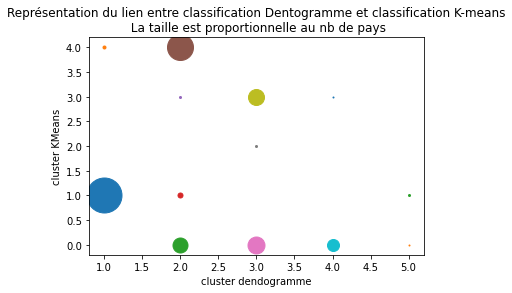

In [143]:
plt.figure()
for i in range(len(double_clust)):
    for j in range(len(double_clust[0])):
        item = double_clust[i,j]
        #print(item)
        if item != 0:
            plt.plot([i],[j], marker="o",  markersize=item)
            
plt.xlabel('cluster dendogramme')
plt.ylabel('cluster KMeans')
plt.title('Représentation du lien entre classification Dentogramme et classification K-means\n La taille est proportionnelle au nb de pays')
plt.show()

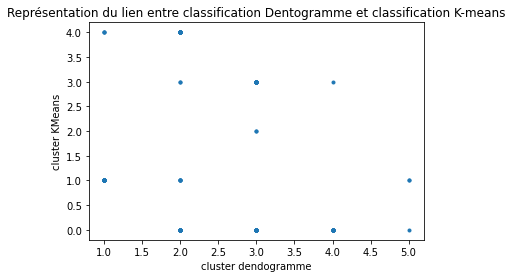

In [144]:
plt.figure()
X = df122['cluster']
Y = df122['clustKmean']
plt.plot(X,Y, '.')
plt.xlabel('cluster dendogramme')
plt.ylabel('cluster KMeans')
plt.title('Représentation du lien entre classification Dentogramme et classification K-means')
plt.show()

In [145]:
list( set([2,3,1,2]) ) 

[1, 2, 3]

In [146]:
list(set(list(df122["clustKmean"])))

[0, 1, 2, 3, 4]

In [147]:
df122

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0    Afghanistan     565.258398                    0.0                 3415.0   
1     Mozambique     532.968249                    0.0                 3329.0   
2           Mali     667.199664                  840.0                 1842.0   
3         Malawi     264.882395                   87.0                  758.0   
4     Madagascar     449.086950                    1.0                   49.0   
..           ...            ...                    ...                    ...   
166      Turquie   10410.632531                 8787.0                18165.0   
167       Égypte    2502.570597                   29.0                  421.0   
168         Oman   17567.429016                   33.0                 1790.0   
170     Jordanie    3316.408329                 1489.0                 4497.0   
171        Liban    7372.727282                   39.0                 3310.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0          1                                          2087.0   
1          1                                          2282.0   
2          1                                          2887.0   
3          1                                          2364.0   
4          1                                          2056.0   
..       ...                                             ...   
166        4                                          3708.0   
167        4                                          3518.0   
168        5                                          3140.0   
170        5                                          3099.0   
171        5                                          3059.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                58.26          
1                                                45.68          
2                                                85.13          
3                                                64.53          
4                                                46.69          
..                                                 ...          
166                                             108.12          
167                                             103.22          
168                                              88.21          
170                                              79.58          
171                                              79.59          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
0                    20.957775       17.808929           1  
1                    13.879159       12.415255           1  
2                    27.828028       19.791376           1  
3                    12.071905        9.812025           1  
4                    21.482116       12.707613           1  
..                         ...             ...         ...  
166                  33.573807        8.995725           0  
167                  25.518310       16.629750           0  
168                  51.808185       24.795107           0  
170                  34.166876       27.006845           1  
171                  36.838799       29.702388           1  

[137 rows x 10 columns]

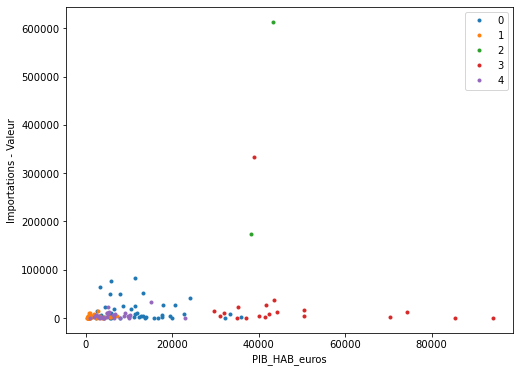

In [148]:
plt.figure(figsize = (8,6))
for cluster_ in list(set(list(df122["clustKmean"]))):
    #print (cluster_)
    df122_loc = df122[df122['clustKmean']==cluster_].copy()
    X = df122_loc['PIB_HAB_euros']
    Y = df122_loc['Importations - Valeur']
    plt.plot(X,Y, '.', label = str(cluster_))
plt.legend()
plt.xlabel("PIB_HAB_euros")
plt.ylabel("Importations - Valeur")
plt.show()
# On choisit 2 axes. Et on représente chaque pays en fonction de ses 2 axes.
# La couleur de chaque point est lié à son cluster. ( ex: bleu = cluster 0)

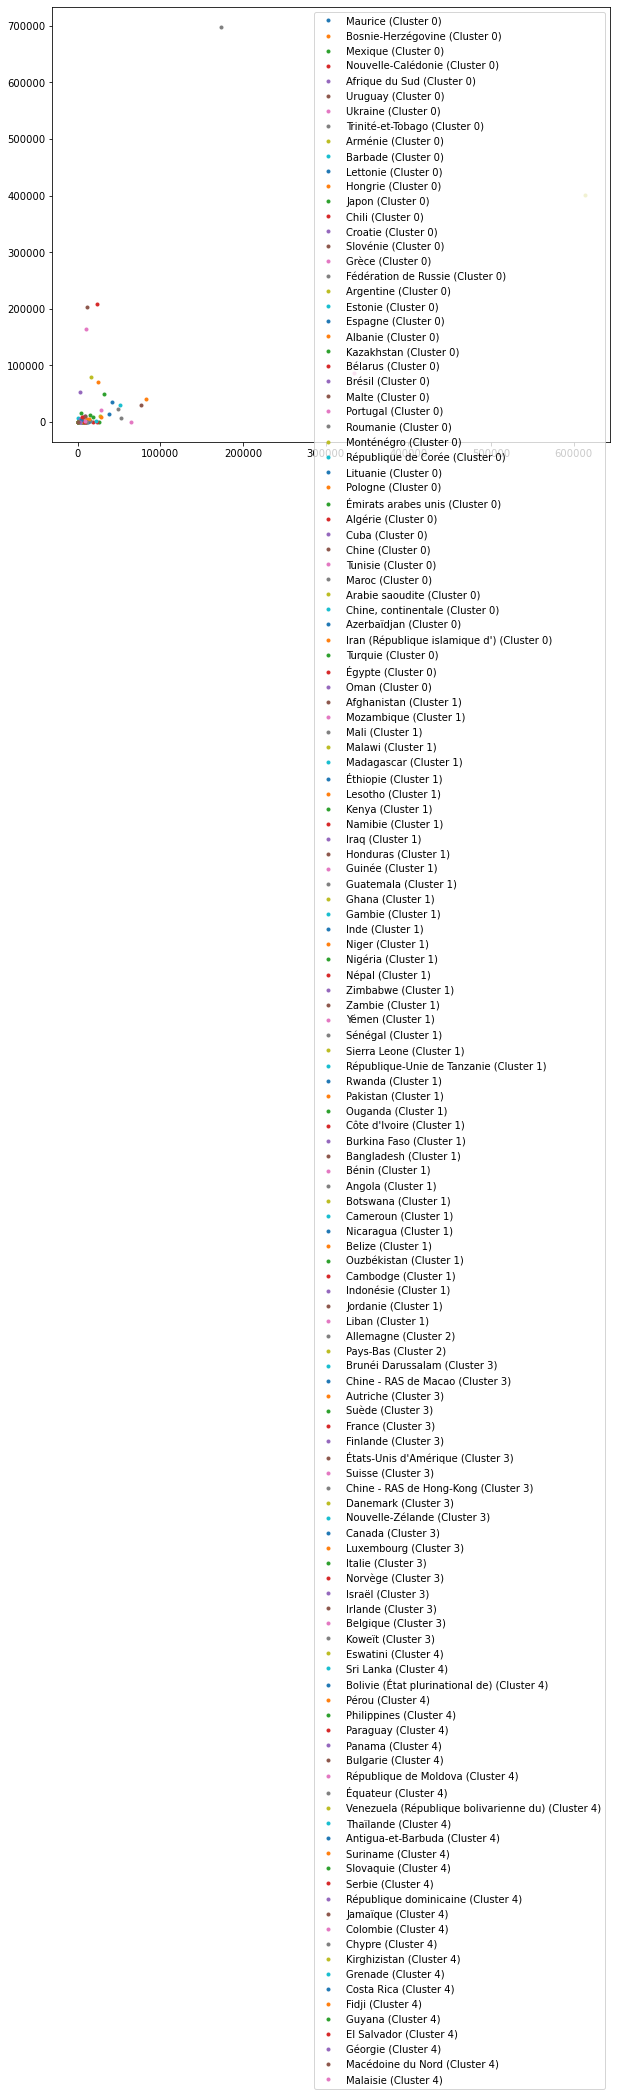

In [149]:
plt.figure(figsize = (10,8))
for cluster_ in list(set(list(df122["clustKmean"]))):
    #print (cluster_)
    df122_loc = df122[df122['clustKmean']==cluster_].copy()
    X = list(df122_loc['Importations - Valeur'].values)
    Y = list(df122_loc['Exportations - Valeur'].values)
    labels = list(df122_loc['Zone'].values)
    for i in range(len(X)):
        plt.plot(X[i], Y[i], '.', label = labels[i] + " (Cluster " + str(cluster_) +")" )
    #plt.plot(X,Y, '.', label = labels) #str(cluster_))
plt.legend()
plt.show()
# On représente toujours l'ensemble des pays selon 2 axes selectionnés.
# Une couleur différente par pays + légende -> Associer chaque point à un pays. 
# Ici: C'est pas possible car trop de points.

In [150]:
df_centroid = pd.DataFrame(scaler.inverse_transform(clr.cluster_centers_))
df_centroid.columns = df123.columns
df_centroid

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0   12248.970202            8019.844444           15792.311111   
1    1729.855489             334.595238            2715.357143   
2   40673.184399          550108.000000          393574.000000   
3   48280.849466           34203.421053           27179.052632   
4    6217.320162            8580.034483            5836.448276   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                     3209.400000   
1                                     2490.047619   
2                                     3362.500000   
3                                     3426.789474   
4                                     2682.172414   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                          96.354222          
1                                          63.664762          
2                                         106.425000          
3                                         107.665263          
4                                          72.095172          

   ratio_prot_ani_prot_total  percentage_pop  
0                  48.112204        2.298036  
1                  24.249159       12.602089  
2                  64.308790        1.119964  
3                  60.439720        5.112643  
4                  46.841410        2.389072

In [151]:
df_centroid.to_csv('dfcentroidkmeans.csv')

In [152]:
df122[df122["clustKmean"] == 2]

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
125  Allemagne   38124.306418               698650.0               173124.0   
143   Pays-Bas   43222.062380               401566.0               614024.0   

     cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
125        3                                          3503.0   
143        3                                          3222.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
125                                             101.39          
143                                             111.46          

     ratio_prot_ani_prot_total  percentage_pop  clustKmean  
125                  60.647007        0.478100           2  
143                  67.970572        1.761827           2

Autre méthode

C:\Users\phili\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



Text(0.5, 1.0, 'Selecting k with the Elbow Method')

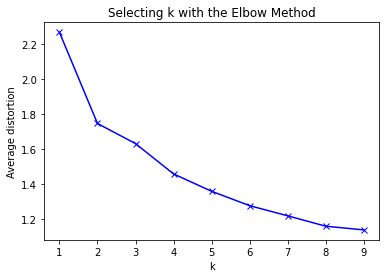

In [153]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
X1= preprocessing.scale(df123)
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X1)
    prediction=model.predict(X1)
    meanDistortions.append(sum(np.min(cdist(X1, model.cluster_centers_, 'euclidean'), axis=1)) / X1.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [154]:
model = KMeans(n_clusters = 5)
model.fit(X1)
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 4, 4, 4,
       4, 1, 3, 3, 0, 4, 4, 0, 4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3,
       3, 4, 4, 4, 4, 0, 4, 4, 3, 4, 4, 4, 1, 4, 4, 4, 4, 3, 1, 4, 0, 3,
       3, 3, 0, 3, 2, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0,
       2, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 1, 1])

-323.24964245556924

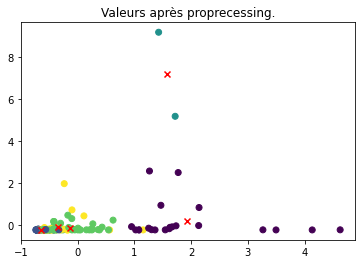

In [155]:
plt.scatter(X1[:,0], X1[:,1], c = model.predict(X1))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],marker="x", c= 'r')
plt.title("Valeurs après proprecessing.")
model.score(X1)

-323.24964245556924

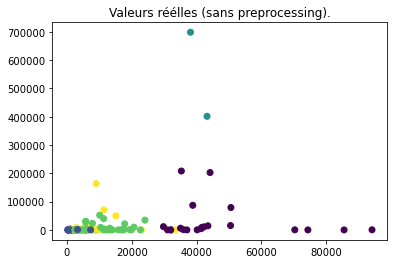

In [156]:
plt.scatter(df122['PIB_HAB_euros'], df122['Exportations - Valeur'], c = model.predict(X1))
# plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],marker="x", c='r')
plt.title("Valeurs réélles (sans preprocessing).")
model.score(X1)

In [157]:
model.cluster_centers_

array([[ 1.93134245e+00,  1.84489795e-01,  1.29497938e-01,
         1.11964453e+00,  1.21693375e+00,  1.07578731e+00,
        -8.66873022e-02],
       [-6.53731515e-01, -2.29586001e-01, -2.28454870e-01,
        -9.73318765e-01, -9.92581050e-01, -1.15422364e+00,
         8.67623379e-01],
       [ 1.57368944e+00,  7.19829853e+00,  6.12480644e+00,
         1.05044242e+00,  1.21242780e+00,  1.38290231e+00,
        -6.07656212e-01],
       [-1.41202636e-01, -1.38760861e-01, -5.27870519e-03,
         7.48919634e-01,  7.28196634e-01,  3.31452276e-01,
        -4.55765044e-01],
       [-3.37404471e-01, -9.48088852e-02, -1.66372197e-01,
        -4.98056026e-01, -5.20907171e-01,  3.07435858e-01,
        -4.74776430e-01]])

In [158]:
df123

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0       565.258398                    0.0                 3415.0   
1       532.968249                    0.0                 3329.0   
2       667.199664                  840.0                 1842.0   
3       264.882395                   87.0                  758.0   
4       449.086950                    1.0                   49.0   
..             ...                    ...                    ...   
166   10410.632531                 8787.0                18165.0   
167    2502.570597                   29.0                  421.0   
168   17567.429016                   33.0                 1790.0   
170    3316.408329                 1489.0                 4497.0   
171    7372.727282                   39.0                 3310.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            2087.0   
1                                            2282.0   
2                                            2887.0   
3                                            2364.0   
4                                            2056.0   
..                                              ...   
166                                          3708.0   
167                                          3518.0   
168                                          3140.0   
170                                          3099.0   
171                                          3059.0   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                58.26          
1                                                45.68          
2                                                85.13          
3                                                64.53          
4                                                46.69          
..                                                 ...          
166                                             108.12          
167                                             103.22          
168                                              88.21          
170                                              79.58          
171                                              79.59          

     ratio_prot_ani_prot_total  percentage_pop  
0                    20.957775       17.808929  
1                    13.879159       12.415255  
2                    27.828028       19.791376  
3                    12.071905        9.812025  
4                    21.482116       12.707613  
..                         ...             ...  
166                  33.573807        8.995725  
167                  25.518310       16.629750  
168                  51.808185       24.795107  
170                  34.166876       27.006845  
171                  36.838799       29.702388  

[137 rows x 7 columns]

In [159]:
df_centroid = pd.DataFrame(model.cluster_centers_)
df_centroid.columns = df123.columns
# Attention: Coordonnées des centroids après préprocessing. (PAS LES VRAIS VALEURS).
df_centroid

PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0       1.931342               0.184490               0.129498   
1      -0.653732              -0.229586              -0.228455   
2       1.573689               7.198299               6.124806   
3      -0.141203              -0.138761              -0.005279   
4      -0.337404              -0.094809              -0.166372   

   Disponibilité alimentaire (Kcal/personne/jour)  \
0                                        1.119645   
1                                       -0.973319   
2                                        1.050442   
3                                        0.748920   
4                                       -0.498056   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                           1.216934          
1                                          -0.992581          
2                                           1.212428          
3                                           0.728197          
4                                          -0.520907          

   ratio_prot_ani_prot_total  percentage_pop  
0                   1.075787       -0.086687  
1                  -1.154224        0.867623  
2                   1.382902       -0.607656  
3                   0.331452       -0.455765  
4                   0.307436       -0.474776

# PCA
La PCA va réduire le nombre de colonnes en essayant de limiter la perte d'information.


# Méthode simple

In [160]:
from sklearn.preprocessing import StandardScaler
features = ['PIB_HAB_euros', 'Exportations - Valeur', 'Importations - Valeur', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'ratio_prot_ani_prot_total', 'percentage_pop']
# Separating out the features
x = df123.loc[:, features].values
"""# Separating out the target
y = df122.loc[:,['clustKmean']].values
? -> Pas nécessaire"""
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [161]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [162]:
pca.explained_variance_ratio_

array([0.49024956, 0.19393121])

In [163]:
sum(pca.explained_variance_ratio_)

0.6841807704057687

In [164]:
principalDf

principal component 1  principal component 2
0                -2.888976               0.794805
1                -3.025809               0.844053
2                -1.228626               0.091315
3                -2.455230               0.549503
4                -3.052034               0.825936
..                     ...                    ...
132               1.045971              -0.547171
133              -0.032858              -0.444922
134               0.036797              -0.321796
135              -1.109136               0.121800
136              -1.075004               0.102682

[137 rows x 2 columns]

In [165]:
finalDf = pd.concat([principalDf, df122[['clustKmean']]], axis = 1)

In [166]:
finalDf_2 = pd.concat([principalDf, df122[['clustKmean','Zone']]], axis = 1)

In [167]:
df122.head(1)

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0  Afghanistan     565.258398                    0.0                 3415.0   

   cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1                                          2087.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          

   ratio_prot_ani_prot_total  percentage_pop  clustKmean  
0                  20.957775       17.808929           1

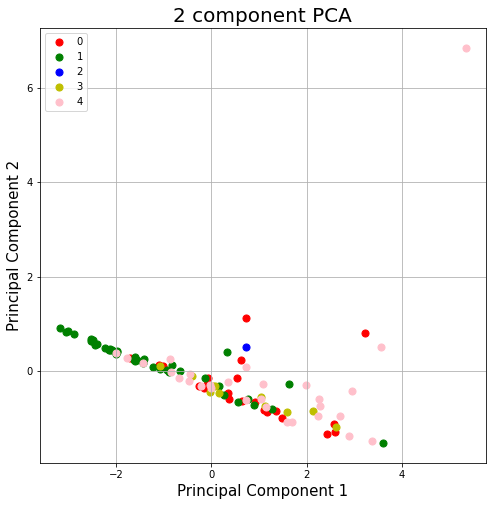

In [168]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1,2,3,4]
colors = ['r', 'g', 'b','y','pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['clustKmean'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [169]:
finalDf_2[finalDf_2['clustKmean'] == 1][['clustKmean', 'Zone']]

clustKmean                         Zone
0           1.0                  Afghanistan
1           1.0                   Mozambique
2           1.0                         Mali
3           1.0                       Malawi
4           1.0                   Madagascar
6           1.0                     Éthiopie
7           1.0                      Lesotho
8           1.0                        Kenya
9           1.0                      Namibie
10          1.0                         Iraq
11          1.0                     Honduras
14          1.0                       Guinée
15          1.0                    Guatemala
16          1.0                        Ghana
17          1.0                       Gambie
19          1.0                         Inde
20          1.0                        Niger
21          1.0                      Nigéria
22          1.0                        Népal
23          1.0                     Zimbabwe
24          1.0                       Zambie
25          1.0                        Yémen
30          1.0                      Sénégal
33          1.0                 Sierra Leone
35          1.0  République-Unie de Tanzanie
39          1.0                       Rwanda
40          1.0                     Pakistan
41          1.0                      Ouganda
43          1.0                Côte d'Ivoire
45          1.0                 Burkina Faso
46          1.0                   Bangladesh
48          1.0                        Bénin
49          1.0                       Angola
50          1.0                     Botswana
51          1.0                     Cameroun
53          1.0                    Nicaragua
55          1.0                       Belize
62          1.0                  Ouzbékistan
107         1.0                     Cambodge
115         1.0                    Indonésie
170         1.0                     Jordanie
171         1.0                        Liban

In [170]:
pca.explained_variance_ratio_

array([0.49024956, 0.19393121])

PCA - cercle correlations - eboulis

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\phili\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



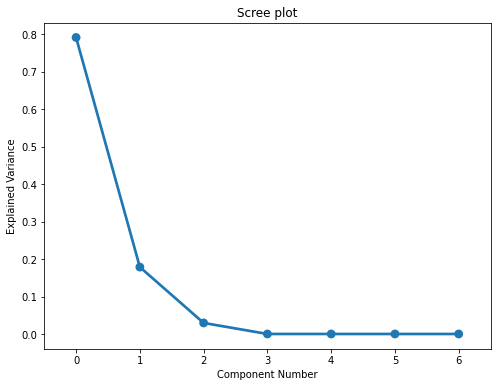

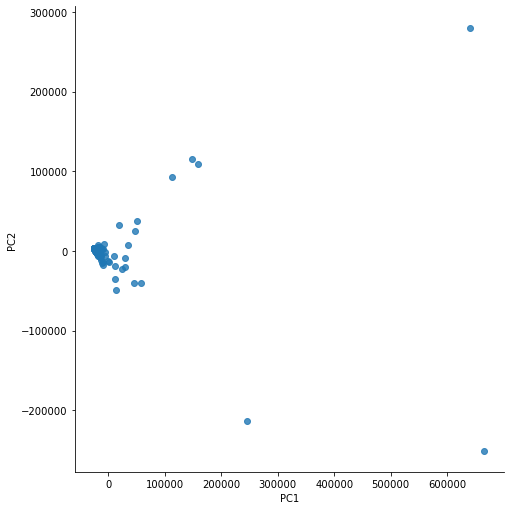

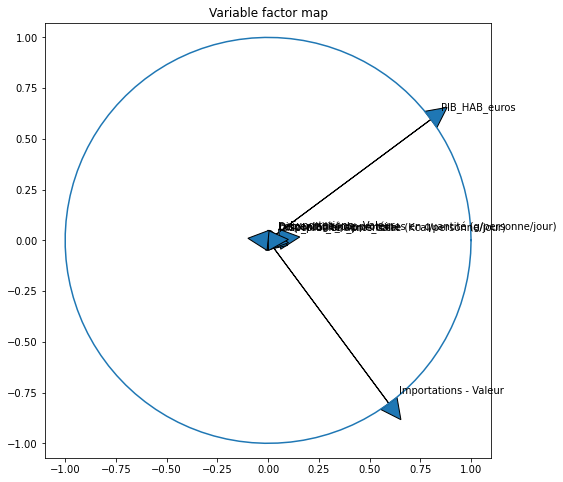

In [171]:
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = df122[['PIB_HAB_euros','Exportations - Valeur','Importations - Valeur','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité alimentaire (Kcal/personne/jour)','ratio_prot_ani_prot_total', 'percentage_pop']] 

 
n_components = 7
 

pca = PCA(n_components=n_components)
reduced = pca.fit_transform(df[['Exportations - Valeur','PIB_HAB_euros','Importations - Valeur','Disponibilité de protéines en quantité (g/personne/jour)','Disponibilité alimentaire (Kcal/personne/jour)','ratio_prot_ani_prot_total', 'percentage_pop']])


for i in range(0, n_components):
    df['PC' + str(i + 1)] = reduced[:, i]

#display(df.head())


ind = np.arange(0, n_components)
(fig, ax) = plt.subplots(figsize=(8, 6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
#plt.show()
fig.savefig('scree plot')

g = sns.lmplot('PC1',
               'PC2',
               #hue = 'Disponibilité alimentaire (Kcal/personne/jour)', #illisible sinon
               data=df,
               fit_reg=False,
               scatter=True,
               size=7)

plt.show()


(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0, 
             pca.components_[0, i],  
             pca.components_[1, i], 
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  
plt.axis('equal')
ax.set_title('Variable factor map')
#plt.show()
fig.savefig('pca cercle correlations')

In [172]:
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.791862402913645, 0.9704965492361833, 0.9999870836971452, 0.9999999742141373, 0.9999999898520088, 0.9999999954328727, 0.9999999999999996]


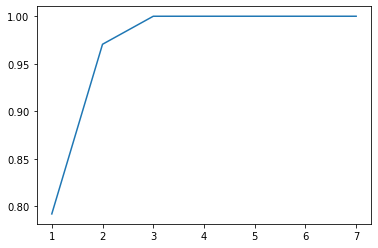

In [173]:
p = df.shape[1]
plt.plot(np.arange(1,7+1),np.cumsum(pca.explained_variance_ratio_))

# fin PCA

# Test adéquation loi normale

In [174]:
df122.columns

Index(['Zone', 'PIB_HAB_euros', 'Exportations - Valeur',
       'Importations - Valeur', 'cluster',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'ratio_prot_ani_prot_total', 'percentage_pop', 'clustKmean'],
      dtype='object')

Zone


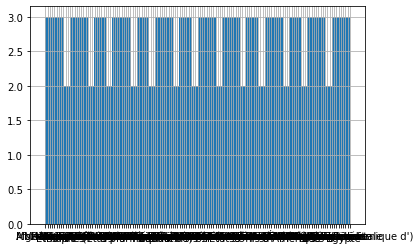

PIB_HAB_euros


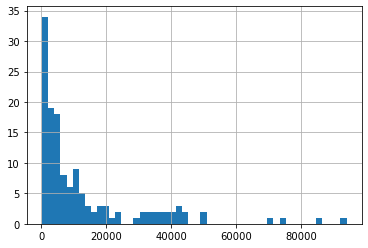

Exportations - Valeur


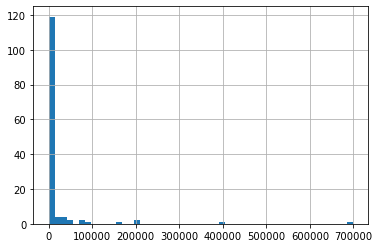

Importations - Valeur


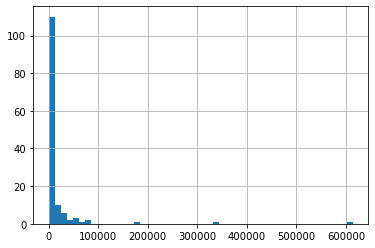

cluster


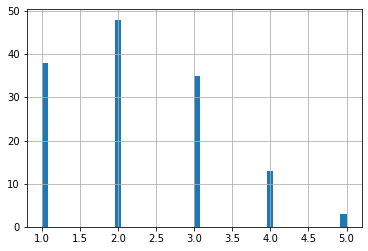

Disponibilité alimentaire (Kcal/personne/jour)


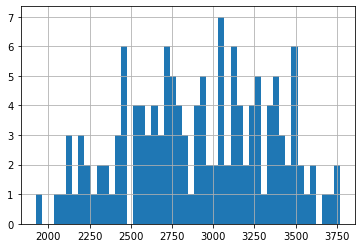

Disponibilité de protéines en quantité (g/personne/jour)


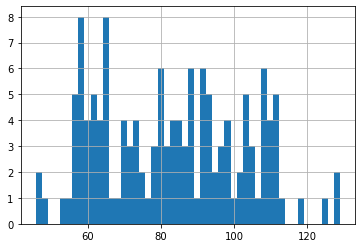

ratio_prot_ani_prot_total


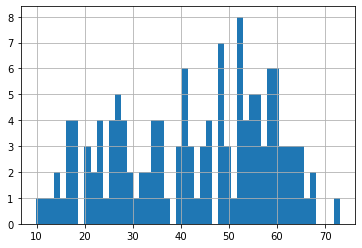

percentage_pop


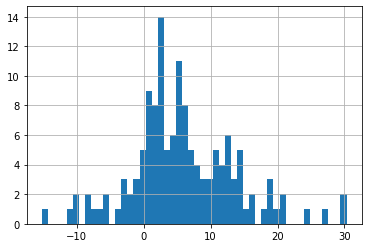

clustKmean


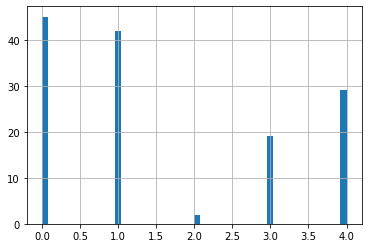

In [175]:
# 1: Exploration 
for col_ in df122.columns:
    plt.figure()
    print(col_)
    df122[col_].hist(bins = 50)
    plt.show()

In [176]:
Xpop = df122['percentage_pop']

In [177]:
from scipy.stats import shapiro

Si la p-value est inférieure à 0.05: Alors il est impossible que ses données ont été obtenus à  partir d'une loi normale.

Si la p-value est supérieur à 0.05: Alors il est POSSIBLE que ses données ont été obtenus à  partir d'une loi normale. (Mais pas de certitude). 

In [178]:

shapiro(Xpop)

ShapiroResult(statistic=0.9733163118362427, pvalue=0.008623031899333)

In [179]:
Xpib = df122['PIB_HAB_euros']

In [180]:
shapiro(Xpib)

ShapiroResult(statistic=0.7099331617355347, pvalue=4.081589616121298e-15)

In [181]:
shapiro(Xpib).pvalue

4.081589616121298e-15

In [182]:
df123.apply(lambda x: shapiro(x).pvalue)

PIB_HAB_euros                                               4.081590e-15
Exportations - Valeur                                       1.457621e-23
Importations - Valeur                                       1.508904e-23
Disponibilité alimentaire (Kcal/personne/jour)              5.585603e-02
Disponibilité de protéines en quantité (g/personne/jour)    3.002561e-03
ratio_prot_ani_prot_total                                   1.402858e-04
percentage_pop                                              8.623032e-03
dtype: float64

In [183]:
shapiro(df122['Disponibilité alimentaire (Kcal/personne/jour)'])

ShapiroResult(statistic=0.9812061190605164, pvalue=0.05585602670907974)

In [184]:
X1= preprocessing.scale(df123)
model = PCA(n_components=2)
X1_reduced = model.fit_transform(X1)
X1_reduced

array([[-2.88897554e+00,  7.94804828e-01],
       [-3.02580918e+00,  8.44053489e-01],
       [-1.22862618e+00,  9.13147376e-02],
       [-2.45522980e+00,  5.49502579e-01],
       [-3.05203441e+00,  8.25936416e-01],
       [-2.91746739e+00,  7.41539424e-01],
       [-1.62266530e+00,  2.31655611e-01],
       [-2.40297056e+00,  5.82235174e-01],
       [-1.99300786e+00,  4.34803576e-01],
       [-1.98360423e+00,  4.08968183e-01],
       [-1.61193133e+00,  3.01236964e-01],
       [-2.14323470e+00,  4.42607760e-01],
       [-1.86405572e+00,  5.32528055e-01],
       [-1.36735713e+00,  2.44375220e-01],
       [-2.22771654e+00,  4.85687817e-01],
       [-1.44743031e+00,  1.69951310e-01],
       [-2.13863681e+00,  4.79049795e-01],
       [-2.00839878e+00,  3.66678806e-01],
       [-2.01597767e+00,  3.79854128e-01],
       [-1.59785773e+00,  2.14115344e-01],
       [-2.50749049e+00,  6.33807925e-01],
       [-3.18663033e+00,  9.21093550e-01],
       [-2.53011865e+00,  6.79816926e-01],
       [-2.

In [185]:
#plt.scatter(x_reduced[:0], x_reduced[:1])

In [186]:
df122.head()

Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0  Afghanistan     565.258398                    0.0                 3415.0   
1   Mozambique     532.968249                    0.0                 3329.0   
2         Mali     667.199664                  840.0                 1842.0   
3       Malawi     264.882395                   87.0                  758.0   
4   Madagascar     449.086950                    1.0                   49.0   

   cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1                                          2087.0   
1        1                                          2282.0   
2        1                                          2887.0   
3        1                                          2364.0   
4        1                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  clustKmean  
0                  20.957775       17.808929           1  
1                  13.879159       12.415255           1  
2                  27.828028       19.791376           1  
3                  12.071905        9.812025           1  
4                  21.482116       12.707613           1

<ipython-input-187-9a54200b6026>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

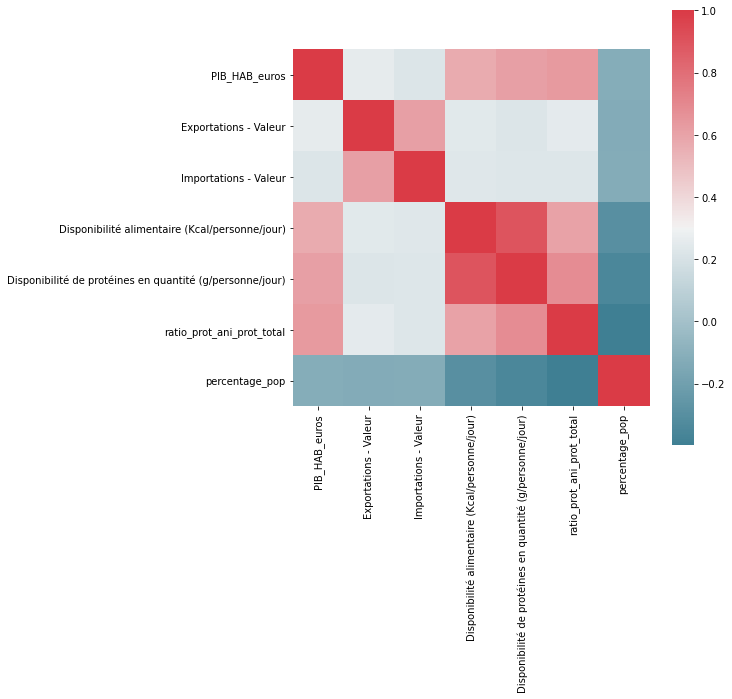

In [187]:
f, ax = plt.subplots(figsize=(8, 8))
corr = df123.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [188]:
df122.head()


Zone  PIB_HAB_euros  Exportations - Valeur  Importations - Valeur  \
0  Afghanistan     565.258398                    0.0                 3415.0   
1   Mozambique     532.968249                    0.0                 3329.0   
2         Mali     667.199664                  840.0                 1842.0   
3       Malawi     264.882395                   87.0                  758.0   
4   Madagascar     449.086950                    1.0                   49.0   

   cluster  Disponibilité alimentaire (Kcal/personne/jour)  \
0        1                                          2087.0   
1        1                                          2282.0   
2        1                                          2887.0   
3        1                                          2364.0   
4        1                                          2056.0   

   Disponibilité de protéines en quantité (g/personne/jour)  \
0                                              58.26          
1                                              45.68          
2                                              85.13          
3                                              64.53          
4                                              46.69          

   ratio_prot_ani_prot_total  percentage_pop  clustKmean  
0                  20.957775       17.808929           1  
1                  13.879159       12.415255           1  
2                  27.828028       19.791376           1  
3                  12.071905        9.812025           1  
4                  21.482116       12.707613           1

In [189]:
X = list(df123['Exportations - Valeur']) 
X

[0.0,
 0.0,
 840.0,
 87.0,
 1.0,
 0.0,
 0.0,
 1750.0,
 0.0,
 0.0,
 195.0,
 0.0,
 1592.0,
 0.0,
 0.0,
 0.0,
 833.0,
 0.0,
 0.0,
 1.0,
 2140.0,
 1490.0,
 0.0,
 250.0,
 186.0,
 0.0,
 2.0,
 23.0,
 3119.0,
 77.0,
 5.0,
 117.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 445.0,
 0.0,
 4781.0,
 341.0,
 0.0,
 95.0,
 0.0,
 2377.0,
 0.0,
 11.0,
 8829.0,
 0.0,
 0.0,
 0.0,
 10267.0,
 0.0,
 0.0,
 329.0,
 0.0,
 1525.0,
 3.0,
 0.0,
 94.0,
 49635.0,
 265.0,
 5412.0,
 630.0,
 115.0,
 70792.0,
 3.0,
 0.0,
 2432.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2828.0,
 0.0,
 0.0,
 0.0,
 8345.0,
 0.0,
 606.0,
 3757.0,
 2.0,
 163535.0,
 9075.0,
 1044.0,
 4416.0,
 6194.0,
 15442.0,
 1190.0,
 698650.0,
 208181.0,
 4342.0,
 292.0,
 34608.0,
 0.0,
 202798.0,
 323.0,
 0.0,
 79194.0,
 13.0,
 6137.0,
 14454.0,
 64.0,
 51997.0,
 346.0,
 58.0,
 11480.0,
 401566.0,
 0.0,
 0.0,
 21509.0,
 10814.0,
 23503.0,
 22.0,
 87024.0,
 16.0,
 2290.0,
 39952.0,
 753.0,
 0.0,
 255.0,
 0.0,
 29756.0,
 0.0,
 1691.0,
 9782.0,
 29756.0,
 25.0,
 4296

In [190]:
sorted_X = X.copy()
sorted_X.sort()
sorted_X

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 5.0,
 11.0,
 13.0,
 16.0,
 22.0,
 23.0,
 25.0,
 29.0,
 33.0,
 39.0,
 58.0,
 64.0,
 77.0,
 87.0,
 94.0,
 95.0,
 115.0,
 117.0,
 186.0,
 195.0,
 250.0,
 255.0,
 265.0,
 292.0,
 323.0,
 329.0,
 341.0,
 346.0,
 445.0,
 606.0,
 630.0,
 753.0,
 833.0,
 840.0,
 1044.0,
 1190.0,
 1489.0,
 1490.0,
 1525.0,
 1592.0,
 1691.0,
 1750.0,
 2140.0,
 2290.0,
 2377.0,
 2432.0,
 2828.0,
 3119.0,
 3757.0,
 4296.0,
 4342.0,
 4416.0,
 4781.0,
 5412.0,
 6137.0,
 6194.0,
 8345.0,
 8787.0,
 8829.0,
 9075.0,
 9782.0,
 10267.0,
 10814.0,
 11480.0,
 14454.0,
 15442.0,
 21509.0,
 23503.0,
 29756.0,
 29756.0,
 34608.0,
 39952.0,
 49635.0,
 51997.0,
 70792.0,
 79194.0,
 87024.0,
 163535.0,
 

In [191]:
sorted_cumsum_X = np.cumsum(sorted_X)
sorted_cumsum_X

array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 2.000000e+00, 3.000000e+00, 5.000000e+00,
       7.000000e+00, 1.000000e+01, 1.300000e+01, 1.800000e+01,
       2.900000e+01, 4.200000e+01, 5.800000e+01, 8.000000e+01,
       1.030000e+02, 1.280000e+02, 1.570000e+02, 1.9000

In [192]:
sum_X = np.sum(X)
sum_X

2373848.0

In [193]:
X_lorenz = [item / sum_X for item in sorted_cumsum_X]
X_lorenz

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.2125696337760464e-07,
 8.425139267552093e-07,
 1.2637708901328139e-06,
 2.106284816888023e-06,
 2.9487987436432324e-06,
 4.212569633776046e-06,
 5.4763405239088605e-06,
 7.5826253407968836e-06,
 1.2216451937950535e-05,
 1.7692792461859394e-05,
 2.443290387590107e-05,
 3.370055707020837e-05,
 4.338946722789328e-05,
 5.3920891312333394e-05,
 6.613734325028393e-05,
 8.003882304174487e-05,
 9.646784461347146e-05,
 0.00012090074848937253,
 0.00014786119414553922,
 0.0001802979803256148,
 0.00021694733613946638,
 0.0002565454906969612,
 0.0002965649022178337,
 0.0003450094530062582,
 0.0003942965177214379,
 0.00047265031290967237,
 0.0005547954207683053,
 0.0006601096616127064,
 0.0007675301872739957,
 0.0

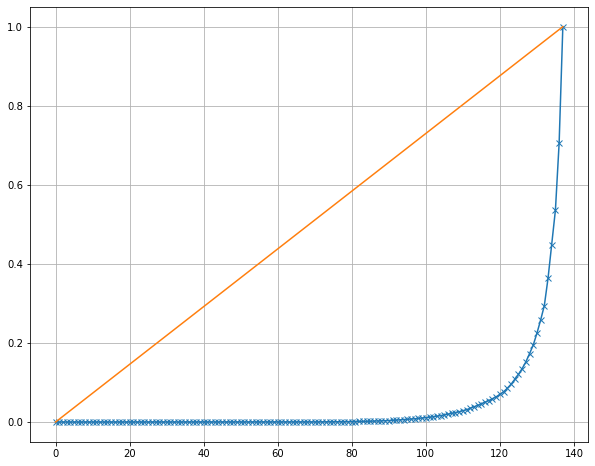

In [194]:
X_lorenz = [0] + X_lorenz
x_axis = [i for i in range(len(X_lorenz))]
plt.figure(figsize = (10,8)) 
plt.plot(x_axis, X_lorenz,'-x')
plt.plot(x_axis, [item / (len(x_axis) - 1) for item in x_axis])
# gini = gini(np.array(X))
# gini_percentage_ = 100 * gini_
# plt.title('Gini: {}\n( = {}%)'.format(gini_, round(gini_percentage_, 1)))
plt.grid()
plt.show()

Calcul Anova

ANOVA
H0 = Les deux variables sont indépendantes
H1 = Les deux variables sont dépendantes
On a une variables quantitative et une variable qualitative donc on utilise le test de Anova pour confirmer où pas l'hypothèses du départ.


In [195]:
# Calcul ANOVA
anova = pg.anova(dv='Disponibilité de protéines en quantité (g/personne/jour)', between='clustKmean', data=df122)
# Print  ANOVA 
pg.print_table(anova)


ANOVA SUMMARY

Source        ddof1    ddof2        F    p-unc    np2
----------  -------  -------  -------  -------  -----
clustKmean        4      132  112.444    0.000  0.773



In [196]:
anova = pg.anova(dv='Disponibilité alimentaire (Kcal/personne/jour)', between='clustKmean', data=df122)
# Print  ANOVA 
pg.print_table(anova)


ANOVA SUMMARY

Source        ddof1    ddof2       F    p-unc    np2
----------  -------  -------  ------  -------  -----
clustKmean        4      132  86.495    0.000  0.724



In [197]:
# Calcul ANOVA
anova = pg.anova(dv='ratio_prot_ani_prot_total', between='clustKmean', data=df122)
# Print  ANOVA 
pg.print_table(anova)


ANOVA SUMMARY

Source        ddof1    ddof2       F    p-unc    np2
----------  -------  -------  ------  -------  -----
clustKmean        4      132  68.223    0.000  0.674



In [198]:
PCA - cercle correlations - eboulis

SyntaxError: invalid syntax (<ipython-input-198-525a501f7f60>, line 1)

In [ ]:
df122.head()

In [ ]:
#plot Disponibilité de protéines en quantité (g/personne/jour)
plot =df122['Disponibilité de protéines en quantité (g/personne/jour)'].hist()
plt.title('Distribution empirique du montant de la disponibilité_protéines(g/personne/jour)')
plt.xlabel('Disponibilité de protéines en quantité (g/personne/jour)')
plt.ylabel("Fréquence d'apparition")
plt.show()


In [ ]:
# plot Disponibilité_alimentaire(Kcal/personne/jour)
plot =df122['Disponibilité alimentaire (Kcal/personne/jour)'].hist()
plt.title('Distribution empirique du montant de la Disponibilité_alimentaire(Kcal/personne/jour)')
plt.xlabel('Disponibilité_alimentaire(Kcal/personne/jour)')
plt.ylabel("Fréquence d'apparition")
plt.show()

In [ ]:
#plot ratio_prot_ani_prot_total
plot =df122['ratio_prot_ani_prot_total'].hist()
plt.title('Distribution empirique du montant du ratio_prot_ani_prot_total')
plt.xlabel('ratio_prot_ani_prot_total')
plt.ylabel("Fréquence d'apparition")
plt.show()


In [ ]:
# plot PIB_en_euros
plot =df122['percentage_pop'].hist()
plt.title('Distribution empirique du pourcentage_dif_pop')
plt.xlabel('pourcentage_dif_pop_2012_2013')
plt.ylabel("Fréquence d'apparition")
plt.show()


In [ ]:
df122

Test l'hypothèse nulle que l'échantillon provient d'une distribution normale.

In [ ]:
var1= df122['Disponibilité de protéines en quantité (g/personne/jour)']
var2 =df122['Disponibilité alimentaire (Kcal/personne/jour)']
var3 =df122['ratio_prot_ani_prot_total']
var4 = df122['percentage_pop']

In [ ]:
stat, p = stats.mstats.normaltest(var1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
    
   print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
   print('L’échantillon ne semble pas gaussien (rejeter H0)')

In [ ]:
stat, p = stats.mstats.normaltest(var2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
    
   print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
   print('L’échantillon ne semble pas gaussien (rejeter H0)')

In [ ]:
stat, p = stats.mstats.normaltest(var3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
    
   print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
   print('L’échantillon ne semble pas gaussien (rejeter H0)')

In [ ]:
stat, p = stats.mstats.normaltest(var4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretion
alpha = 0.05
if p > alpha:
    
   print('L’échantillon semble gaussien (ne pas rejeter H0)')
else:
   print('L’échantillon ne semble pas gaussien (rejeter H0)')

Test adequation variance  entre cluster 3 et 4  (issus du dendrogram)

Test de student

In [ ]:
stats.ttest_ind(var1[df122['cluster'] == 3], var1[df122['cluster'] == 4])

In [ ]:
stats.ttest_ind(var2[df122['cluster'] == 3], var2[df122['cluster'] == 4])

In [ ]:
stats.ttest_ind(var3[df122['cluster'] == 3], var3[df122['cluster'] == 4])

Le test de Student permet de comparer deux échantillons.

Il va estimer la probabilité que la différence entre ces deux échantillons soit due au hasard (la p-value).

Plus la p-value est petite, plus la différence est certaine.
donc ici, un rapprochement sur la variable "Disponibilité de protéines en quantité (g/personne/jour)"  mais sinon les differences entre clusters sont bien marqués.

Test de Fischer - adequation de la variance

In [ ]:
stats.bartlett(var1[df122['cluster'] == 3], var1[df122['cluster'] == 4])

In [ ]:
stats.bartlett(var2[df122['cluster'] == 3], var2[df122['cluster'] == 4])

In [ ]:
stats.bartlett(var3[df122['cluster'] == 3], var3[df122['cluster'] == 4])

H0 : Les variances sont similaires.
H alternative : Les variances sont différentes.
Ici  on rejete l'hypothese nulle

essai dendragram

In [ ]:
pip install plotly==5.4.0

In [ ]:
import plotly.graph_objects as go

In [ ]:
from plotly.figure_factory import create_dendrogram
import numpy as np
  
  
X = np.random.rand(5,5)
fig = create_dendrogram(X)
fig.show()

In [ ]:
import plotly.graph_objects as go


In [ ]:
fig = go.Figure(   
go.Scattermapbox(
        lat = ['40.7142', '39.9075'],
        lon = ['-74.0059','116.3972'],
    marker=go.scattermapbox.Marker(
            size=14
)))
fig.update_layout(
#mapbox_style = 'stamen-terrain'
#mapbox_style = 'open-street-map'
mapbox_style = 'open-street-map'
)

fig.show()

In [ ]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np
  
df = go.data.tips()
  
x = df['total_bill']
y = df['day']
  
plot = px.Figure(data=[px.Scatter(
    x=x,
    y=y,
    mode='lines',)
])
  
plot.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     step="day",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
    )
)
  
plot.show()

In [ ]:
df122.head()
len(df122)
df122

In [ ]:
listpays = df122['Zone'].values.tolist()
listpays

In [ ]:
sorted(listpays)

In [ ]:
GEO3.head()

In [ ]:
len(GEO3)

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(   
go.Scattermapbox(
        lat = GEO3["Latitude"],
        lon = GEO3["Longitude"],
    marker=go.scattermapbox.Marker(
            size=14
)))
fig.update_layout(
#mapbox_style = 'stamen-terrain'
mapbox_style = 'open-street-map'
#mapbox_style = 'open-street-map'
)

fig.show()

In [ ]:
pip install plotly

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(   
go.Scattermapbox(
        lat = ['33.0', '-29.0',"28.0"],
        lon = ['65.O','24.0', "3.0"],
    marker=go.scattermapbox.Marker(
            size=14
)))
fig.update_layout(
#mapbox_style = 'stamen-terrain'
#mapbox_style = 'open-street-map'
mapbox_style = 'open-street-map'
)

fig.show()

In [ ]:
df122.head()

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly
import plotly.graph_objs as go 
from dash.dependencies import Input, Output
import dash_table
import pandas as pd 
import numpy as np 
import folium
import os

In [ ]:
df7.head()

In [ ]:
df11.head()

In [ ]:
df124 = pd.merge(df122,GEO3, on = 'Zone', how='outer')
df124

In [ ]:
df124.head()

In [ ]:
pip install dash-bootstrap-components

In [ ]:


import dash
from dash import dcc


import dash
from dash import dcc
from dash import html
import plotly
import plotly.graph_objs as go 
from dash.dependencies import Input, Output
import dash_table
import pandas as pd 
import numpy as np 
import folium
import os
import dash_bootstrap_components as dbc
import dash_html_components as html
import base64

card_main = dbc.Card([
      dbc.CardImg(src="/static/scree plot.png", top=True, bottom=False,title='PCA1'),
    
])

card_main2 = dbc.Card([
      
    dbc.CardImg(src="/static/pca cercle correlations.png", top=True, bottom=False,title = 'PCA2'),
])

card_main3 = dbc.Card([
      
    dbc.CardImg(src="/static/EDA0.png", top=True, bottom=False,title = 'EDA0'),
])
card_main4 = dbc.Card([
      
    dbc.CardImg(src="/static/EDA1.png", top=True, bottom=False,title = 'EDA1'),
])
card_main5 = dbc.Card([
      
    dbc.CardImg(src="/static/EDA2.png", top=True, bottom=False,title = 'EDA1'),
])
card_main6 = dbc.Card([
      
    dbc.CardImg(src="/static/EDA3.png", top=True, bottom=False,title = 'EDA1'),
])

card_main7 = dbc.Card([
      
    dbc.CardImg(src="/static/Dendrogram.png", top=True, bottom=False,title = 'cah'),
])

card_main8 = dbc.Card([
      
    dbc.CardImg(src="/static/compare_dispo_proteines.png", top=True, bottom=False,title = 'cah'),
])


card_main9 = dbc.Card([
      
    dbc.CardImg(src="/static/images11.JPG", top=True, bottom=False,title = 'trade'),
])



Country = [{'label':Zone, 'value':Zone} for Zone in df124["Zone"].unique()]

app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    html.Div([
    html.H3("Choisissez votre pays : "),
    dcc.Dropdown(
        id= 'Zone-picker',
        options = Country,
        value= "France"
    )
    ],style = {
       'width':"30%",
        "border":'2px solid #eee',
        "padding": "30px 30px 30px 120px",
        "box-shadow": "0 2px 2px #ccc",
        "display": "inline-block",
        "verticalAlign": 'top'}),
    
    
    html.Div([
        dcc.Tabs(id= "tabs", value = 'tab-1', children = [
            ###ONGLET INFOS
            dcc.Tab(label = 'infos Générales', children = [
                html.Div([
                    html.H3("informations générales")
                ],style= {'background':'#9B817B', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                html.Div([
                    dash_table.DataTable(
                        id = 'table_infos',
                        style_cell = {'font-family':'Montserrat'},
                        style_header = {
                            'backgroundColor': 'rgb(230,230,230)',
                            'fontweight':'bold'}
                    )
                ], style={'width':'40%', 'border':'1px solid #eee','box-shadow':'o 2px 2px #ccc', 'display': 'inline-block', 
                         'verticalAlign':'top', 'padding': '60px 30px 60px 30px' 
                         }),
                html.Div(id = "map", style={'display': 'inline-block','verticalAlign':'top','width': '50%', 'padding':'60px 30px 60px 30px'}),
            ]), 
            ####ONGLET EDA
            dcc.Tab(label = 'EDA', children = [
                #(html.Img(src=app.get_asset_url('/toto.png')))
                 #html.Div([ html.Img(src='data:toto.png;base64,{}') ])
                html.Div([
                    html.H3("EDA")
                ],style= {'background':'#c2beb2', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                html.Div([
                html.H5 ("Quelques explorations de données : - les 20 meilleurs pays/Dispo alimentaire - les 20 pires pays - La disponibilité protéinique/pays - La disponibilité alimentaire/PIB"),
                    
                ],style= {'width':'50%','background':'#e4eced','display': 'inline-block','margin-left': '45vw','verticalAlign':'top','background':'#b9c7c9', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
               
                html.Div([
                    dbc.Row([dbc.Col(card_main3,width=4)], style={}),
                ]),
                html.Div([
                    dbc.Row([dbc.Col(card_main4,width=4)], style={}),
                ]),
                html.Div([
                    dbc.Row([dbc.Col(card_main5,width=4)], style={}),
                ]),
                html.Div([
                    dbc.Row([dbc.Col(card_main6,width=4)], style={}),
                ]),
            ]), 
            ###ONGLET CLUSTER
            dcc.Tab(label = 'Cluster', children = [
                    html.Div([
                    html.H3("Cluster"),
                    
                ],style= {'background':'#8da3a6', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                html.Div([
                
                    html.H5 ("Minimiser les distances au sein d'un cluster et maximiser la distance entre les différents clusters"),
                    
                ],style= {'width':'50%','background':'#e4eced','display': 'inline-block','margin-left': '45vw','verticalAlign':'top','background':'#b9c7c9', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                html.Div([
                    dbc.Row([dbc.Col(card_main7,width=4)], style={}),
                ]),
                
            ]),
            ###ONGLET STATS
            dcc.Tab(label = 'Stats', children = [
                html.Div([
                    html.H3("Stats")
                ],style= {'background':'#83c0c9', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                
                html.Div([
                
                    html.H5 ("Tests Fischer- Student - Anova"),
                    
                ],style= {'width':'50%','background':'#e4eced','display': 'inline-block','margin-left': '45vw','verticalAlign':'top','background':'#b9c7c9', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
            
                
                html.Div([
                    dbc.Row([dbc.Col(card_main8,width=4)], style={}),
                ]),
                
            ]),
            ###ONGLET PCA
            dcc.Tab(label = 'PCA', children= [
                html.Div([
                    html.H3("PCA")
                ],style= {'background':'#3a8d99', 'color': "black","textAlign":'center', "padding":"10px 0px 10px 0px"}),
                
                html.Div([
                    dbc.Row([dbc.Col(card_main,width=4)], style={}),
                ]),
                html.Div([
                    dbc.Row([dbc.Col(card_main2,width=4)], style={}),
                ]),
            ]),
        ])
        
    ])
])


  
    
@app.callback([Output('table_infos', 'data'), Output('table_infos', 'columns')],
              [Input('Zone-picker','value')])
def update_generales(Zone_choisie):
    colones = df124.columns
    col_off = ['Exportations - Valeur', 'Importations - Valeur', 'cluster', 'clustKmean']
    listinfos = [info for info in colones if info not in col_off]
    infos = {
        'intitulé': listinfos,
        'donnée': [df124[df124['Zone']==Zone_choisie][col].iloc[0]for col in listinfos]
    }
    table = pd.DataFrame(infos)
    data = table.to_dict("rows")
    entete = {'id':'intitulé', 'name': '   '}, {'id': 'donnée', 'name':Zone_choisie}
    return data, entete

@app.callback(Output('map','children'), [Input('Zone-picker','value')])
def update_location(Zone_choisie):
    latitude = df124[df124['Zone']==Zone_choisie]['Latitude'].iloc[0]
    longitude = df124[df124['Zone']==Zone_choisie]['Longitude'].iloc[0]
    
    carte = folium.Map(location= (latitude, longitude), zoom_start = 6)
    marker = folium.Marker(location = [latitude, longitude])
    marker.add_to(carte)
    carte.save("destination.html")
    return html.Iframe(srcDoc = open('destination.html','r').read(), width='100%', height = '600')
   
    
    
    
    

server = app.server


if __name__=='__main__':
    app.run_server()